# **FINAL PROJECT RAKAMIN ID/X PARTNER DATA SCIENCE by MARYESTA APRILIANI SIHOMBING**



#**Library**

In [ ]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Importing Dataset**


In [ ]:
data_raw = pd.read_csv('/content/drive/MyDrive/Data Analyst & Data Scientist/ID X Partners/loan_data_2007_2014.csv', index_col=0)

<ipython-input-3-31f447b0d1e0>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv('/content/drive/MyDrive/Data Analyst & Data Scientist/ID X Partners/loan_data_2007_2014.csv', index_col=0)


#**Data Understanding**

In [ ]:
# Melihat dimensi dataset
print("Jumlah baris dan kolom:", data_raw.shape)

Jumlah baris dan kolom: (466285, 74)


In [ ]:
# Melihat nama kolom dan tipe datanya
print("\nTipe data per kolom:")
print(data_raw.dtypes)


Tipe data per kolom:
id                               int64
member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
del

In [ ]:
# Melihat 5 baris pertama
data_raw.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Menampilkan informasi umum kolom
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13  annu

Dapat dilihat terdapat beberapa kolom yang memiliki 0 Non-null yang artinya kolom tersebut tidak memiliki nilai untuk keseluruhan, oleh karena itu kita akan menghapus kolom tersebut

In [ ]:
# Menghapus kolom yang semua nilainya null (non-null = 0)
data_cleaned = data_raw.dropna(axis=1, how='all')

In [ ]:
# Menampilkan informasi umum setelah penghapusan kolom yang semuanya nilalinya null (non-null = 0)
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466285 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13  annu

In [ ]:
data_cleaned.shape

(466285, 57)

### Checking Missing Value

In [ ]:
# Menghitung persentase missing value untuk setiap kolom
percent_missing = data_cleaned.isnull().sum() * 100 / len(data_cleaned)

# Mendapatkan tipe data untuk setiap kolom
dtypes = [data_cleaned[col].dtype for col in data_cleaned.columns]

# Membuat DataFrame ringkasan missing value dan tipe data
missing_value_df = pd.DataFrame({
    'data_type': dtypes,
    'percent_missing': percent_missing
})

# Mengurutkan kolom berdasarkan persentase missing value dari yang tertinggi
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)

# Menampilkan 10 kolom teratas dengan persentase missing tertinggi
missing_value_df.head(10)

,data_type,percent_missing
mths_since_last_record,float64,86.566585
mths_since_last_major_derog,float64,78.773926
desc,object,72.981975
mths_since_last_delinq,float64,53.690554
next_pymnt_d,object,48.728567
total_rev_hi_lim,float64,15.071469
tot_coll_amt,float64,15.071469
tot_cur_bal,float64,15.071469
emp_title,object,5.916553
emp_length,object,4.505399


**Kolom dengan Missing Value > 50%:**

* mths_since_last_record: Jumlah bulan sejak catatan publik terakhir.
* mths_since_last_major_derog: Jumlah bulan sejak terakhir kali mendapatkan peringkat kredit sangat buruk (90 hari menunggak atau lebih parah).

* desc: Deskripsi pinjaman yang diberikan oleh peminjam.

* mths_since_last_delinq: Jumlah bulan sejak keterlambatan pembayaran terakhir oleh peminjam.

**Kolom dengan Missing Value 40% – 50%:**
* next_payment_d: Bulan terakhir pembayaran diterima.

**Kolom dengan Missing Value 1% – 20%:**
* tot_cur_bal: Total saldo berjalan dari seluruh akun.

* tot_coll_amt: Total jumlah tagihan penagihan yang pernah dimiliki.

* total_rev_hi_lim: Total batas kredit maksimum pada akun revolving.

* emp_title: Judul pekerjaan yang dicantumkan peminjam saat mengajukan pinjaman.

* emp_length: Lama masa kerja dalam tahun, berkisar dari 0 (kurang dari 1 tahun) hingga 10 (sepuluh tahun atau lebih).

In [ ]:
# Menampilkan 47 kolom terbawah dengan persentase missing tertinggi
missing_value_df.tail(47)

,data_type,percent_missing
last_pymnt_d,object,0.080637
revol_util,float64,0.072917
collections_12_mths_ex_med,float64,0.031097
last_credit_pull_d,object,0.009007
earliest_cr_line,object,0.006219
open_acc,float64,0.006219
inq_last_6mths,float64,0.006219
delinq_2yrs,float64,0.006219
pub_rec,float64,0.006219
total_acc,float64,0.006219


**Kolom dengan Missing Value < 1%:**
* last_pymnt_d: Bulan terakhir ketika pembayaran dilakukan oleh peminjam.

* revol_util: Persentase pemanfaatan kredit revolving, yaitu proporsi kredit yang digunakan dibanding total kredit yang tersedia.

* collections_12_mths_ex_med: Jumlah penagihan dalam 12 bulan terakhir, tidak termasuk tagihan medis.

* last_credit_pull_d: Bulan terakhir ketika Lending Club menarik data kredit untuk pinjaman ini.

* pub_rec: Jumlah catatan publik yang bersifat negatif (seperti kebangkrutan atau keputusan pengadilan).

* inq_last_6mths: Jumlah penyelidikan kredit (inquiries) dalam 6 bulan terakhir.

* delinq_2yrs: Jumlah keterlambatan pembayaran yang tercatat dalam dua tahun terakhir.

* open_acc: Jumlah akun kredit yang masih aktif dalam file kredit peminjam.

* earliest_cr_line: Bulan saat akun kredit pertama peminjam dibuka.

* acc_now_delinq: Jumlah akun yang saat ini mengalami keterlambatan pembayaran.

* total_acc: Jumlah total jalur kredit (akun) yang dimiliki peminjam.

* title: Judul pinjaman yang diberikan oleh peminjam (tipe data: object).

In [ ]:
#Menampilkan banyaknya duplikat data
data_cleaned.duplicated().sum()

np.int64(0)

Tidak terdapat duplikat data dalam dataset

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466285 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13  annu

# **Data Preprocessing**



## **Menangani Missing Value**

In [ ]:
# Daftar kolom yang ingin dihapus karena missing value > 55%
columns_to_drop = [
    'mths_since_last_record',
    'next_pymnt_d',
    'desc',
]
# Menghapus kolom dari DataFrame
data_cleaned = data_cleaned.drop(columns=columns_to_drop)

# Cek bentuk data setelah penghapusan
print("Bentuk data setelah menghapus kolom:", data_cleaned.shape)

Bentuk data setelah menghapus kolom: (466285, 54)


## **Handling Missing Values with Imputation**

Untuk kolom mths_since_last_delinq dan mths_since_last_major_derog yang memiliki persentase missing value antara 40% hingga 55%, saya melakukan imputasi dengan nilai "0" (nol).
Sementara itu, untuk kolom lainnya, saya menggunakan strategi imputasi berdasarkan tipe data:

* Untuk fitur numerik, saya mengisi nilai yang hilang dengan median.
* Untuk fitur kategorikal, saya mengisi nilai yang hilang dengan modus (nilai yang paling sering muncul).

In [ ]:
# Imputasi dua kolom tertentu dengan nilai 0
data_cleaned['mths_since_last_delinq'] = data_cleaned['mths_since_last_delinq'].fillna(0)
data_cleaned['mths_since_last_major_derog'] = data_cleaned['mths_since_last_major_derog'].fillna(0)

In [ ]:
# Imputasi median untuk semua kolom numerik yang masih punya missing values
num_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    if data_cleaned[col].isnull().sum() > 0:
        median_val = data_cleaned[col].median()
        data_cleaned[col] = data_cleaned[col].fillna(median_val)

# Imputasi mode untuk semua kolom kategorikal yang masih punya missing values
cat_cols = data_cleaned.select_dtypes(include=['object']).columns

for col in cat_cols:
    if data_cleaned[col].isnull().sum() > 0:
        mode_val = data_cleaned[col].mode()[0]
        data_cleaned[col] = data_cleaned[col].fillna(mode_val)

In [ ]:
print("Total missing values setelah imputasi:", data_cleaned.isnull().sum().sum())

Total missing values setelah imputasi: 0


## **Check Unique Values**

In [ ]:
print("Unique Features (Numerical)")
print(data_cleaned.select_dtypes(exclude='object').nunique())

Unique Features (Numerical)
id                             466285
member_id                      466285
loan_amnt                        1352
funded_amnt                      1354
funded_amnt_inv                  9854
int_rate                          506
installment                     55622
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
out_prncp_inv                  141189
total_pymnt                    351609
total_pymnt_inv                347659
total_rec_prncp                172713
total_rec_int                  270249
total_rec_late_fee               5808
recoveries                      22773
collection_recovery_fe

In [ ]:
print("\nUnique Features (Categorical)")
print(data_cleaned.select_dtypes(include='object').nunique())


Unique Features (Categorical)
term                        2
grade                       7
sub_grade                  35
emp_title              205475
emp_length                 11
home_ownership              6
verification_status         3
issue_d                    91
loan_status                 9
pymnt_plan                  2
url                    466285
purpose                    14
title                   63098
zip_code                  888
addr_state                 50
earliest_cr_line          664
initial_list_status         2
last_pymnt_d               98
last_credit_pull_d        103
application_type            1
dtype: int64


In [ ]:
data_cleaned["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

untuk kolom term masih memiliki spasi sebelum kalimatnya, oleh karena itu perlu di bersihkan

In [ ]:
# Membersihkan spasi di awal dan akhir dari setiap nilai dalam kolom 'term'
data_cleaned['term'] = data_cleaned['term'].str.strip()

# Menampilkan nilai unik dari kolom 'term' setelah dibersihkan
data_cleaned['term'].unique()

array(['36 months', '60 months'], dtype=object)

In [ ]:
data_cleaned["grade"].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [ ]:
data_cleaned["sub_grade"].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [ ]:
data_cleaned["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [ ]:
data_cleaned["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [ ]:
data_cleaned["purpose"].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

### **Memformat Variabel Target (Y)**


* `loan_status` akan menjadi Y variabel kita
* Namun dikarenakan variabel tersebut masih memiliki unique value sebanyak 9, maka perlu dilakukan binary classification untuk mempermudah kinerja





In [ ]:
data_cleaned["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

* Good Loan (1): Meliputi status 'Fully Paid' dan 'Does not meet the credit policy. Status:Fully Paid', yang menunjukkan bahwa pinjaman telah dilunasi meskipun mungkin tidak memenuhi kebijakan kredit awalnya.

* Bad Loan (0): Terdiri dari status 'Charged Off', 'Does not meet the credit policy. Status:Charged Off', 'Default', dan 'Late (31–120 days)', yang merepresentasikan pinjaman bermasalah atau gagal bayar.

* Undetachable Loan (-1): Mencakup status 'Current', 'In Grace Period', dan 'Late (16–30 days)', yaitu pinjaman yang masih berjalan dan belum dapat diklasifikasikan secara pasti sebagai baik atau buruk.

* Saya hanya akan menggunakan Good Loan (1) dan Bad Loan (0) sebagai
target untuk pemodelan klasifikasi biner.
* Sementara itu, kategori Undetachable Loan (-1) akan dihapus karena status pinjamannya masih berlangsung dan belum dapat dipastikan hasil akhirnya.

In [ ]:
# Buat dictionary mapping untuk mengonversi status pinjaman ke label numerik
# 1 = Good Loan, 0 = Bad Loan, -1 = Undetectable (akan dibuang)
target_dict = {
    'Fully Paid': 1,
    'Does not meet the credit policy. Status:Fully Paid': 1,
    'Charged Off': 0,
    'Does not meet the credit policy. Status:Charged Off': 0,
    'Default': 0,
    'Late (31-120 days)': 0,
    'Current': -1,
    'In Grace Period': -1,
    'Late (16-30 days)': -1
}

In [ ]:
# Ubah nilai di kolom 'loan_status' menjadi angka dengan menggunakan mapping
data_cleaned['loan_status'] = data_cleaned['loan_status'].map(target_dict)

In [ ]:
# Buang baris dengan loan_status = -1 (Undetectable Loan)
data_cleaned = data_cleaned.loc[~data_cleaned['loan_status'].isin([-1])].reset_index(drop=True)

In [ ]:
# Cek 5 baris pertama untuk memastikan mapping berhasil
data_cleaned.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,0,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,0.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
4,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-04,3.0,0.0,9.0,0.0,7963,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-15,161.03,Sep-15,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0


In [ ]:
# Buang pinjaman yang statusnya belum bisa dikategorikan sebagai good/bad
data_cleaned = data_cleaned.loc[~data_cleaned['loan_status'].isin([-1])].reset_index(drop=True)

# Cek struktur data setelah penghapusan
data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237695 entries, 0 to 237694
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           237695 non-null  int64  
 1   member_id                    237695 non-null  int64  
 2   loan_amnt                    237695 non-null  int64  
 3   funded_amnt                  237695 non-null  int64  
 4   funded_amnt_inv              237695 non-null  float64
 5   term                         237695 non-null  object 
 6   int_rate                     237695 non-null  float64
 7   installment                  237695 non-null  float64
 8   grade                        237695 non-null  object 
 9   sub_grade                    237695 non-null  object 
 10  emp_title                    237695 non-null  object 
 11  emp_length                   237695 non-null  object 
 12  home_ownership               237695 non-null  object 
 13 

### **Setting Format Tanggal**

In [ ]:
data_cleaned[['issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']].head(3)

,issue_d,last_pymnt_d,last_credit_pull_d,earliest_cr_line
0,Dec-11,Jan-15,Jan-16,Jan-85
1,Dec-11,Apr-13,Sep-13,Apr-99
2,Dec-11,Jun-14,Jan-16,Nov-01


In [ ]:
# Konversi kolom 'earliest_cr_line' dari string ke format datetime dengan format Bulan-Tahun
data_cleaned['earliest_cr_line'] = pd.to_datetime(data_cleaned['earliest_cr_line'], format='%b-%y')

# Definisikan fungsi untuk mengoreksi tahun jika terbaca sebagai tahun > 2016 (misalnya 2069 harusnya 1969)
def date_time(dt):
    if dt.year > 2016:
        dt = dt.replace(year=dt.year - 100)
    return dt

In [ ]:
data_cleaned['earliest_cr_line'] = data_cleaned['earliest_cr_line'].apply(lambda x: date_time(x))

In [ ]:
# Konversi kolom tanggal lainnya ke format datetime
data_cleaned['issue_d'] = pd.to_datetime(data_cleaned['issue_d'], format='%b-%y')                 # Tanggal pinjaman diberikan
data_cleaned['last_pymnt_d'] = pd.to_datetime(data_cleaned['last_pymnt_d'], format='%b-%y')       # Tanggal pembayaran terakhir
data_cleaned['last_credit_pull_d'] = pd.to_datetime(data_cleaned['last_credit_pull_d'], format='%b-%y')  # Tanggal penarikan data kredit terakhir

In [ ]:
# Tampilkan 3 baris pertama untuk memastikan hasil konversi berhasil
data_cleaned[['issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']].head(3)

,issue_d,last_pymnt_d,last_credit_pull_d,earliest_cr_line
0,2011-12-01,2015-01-01,2016-01-01,1985-01-01
1,2011-12-01,2013-04-01,2013-09-01,1999-04-01
2,2011-12-01,2014-06-01,2016-01-01,2001-11-01


Saya membuat dua kolom baru berdasarkan data tanggal (datetime):

* `pymnt_time` menunjukkan jumlah bulan antara tanggal pinjaman mulai didanai (`issue_d`) dan tanggal pembayaran terakhir yang diterima (`last_pymnt_d`).

* `credit_pull_year` menunjukkan jumlah tahun antara saat peminjam pertama kali memiliki riwayat kredit (`earliest_cr_line`) dan tanggal terakhir pihak Lending Club menarik data kredit untuk pinjaman tersebut (`last_credit_pull_d`).

In [ ]:
# Fungsi untuk menghitung selisih dalam bulan antara dua tanggal
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

# Fungsi untuk menghitung selisih dalam tahun antara dua tanggal
def diff_year(d1, d2):
    return d1.year - d2.year

In [ ]:
# Cek apakah ada baris yang hasilnya negatif (misalnya pembayaran terjadi sebelum pinjaman diberikan)
((data_cleaned.apply(lambda x: diff_month(x.last_pymnt_d, x.issue_d), axis=1) < 0)).any()


np.False_

In [ ]:
# Cek apakah ada baris yang hasilnya negatif pada lama pengalaman kredit
(data_cleaned.apply(lambda x: diff_year(x.last_credit_pull_d, x.earliest_cr_line), axis=1) < 0).any()

np.False_

In [ ]:
# Tambahkan fitur lama waktu pembayaran pinjaman (dalam bulan)
data_cleaned['pymnt_time'] = data_cleaned.apply(lambda x: diff_month(x.last_pymnt_d, x.issue_d), axis=1)

# Tambahkan fitur lama pengalaman kredit (dalam tahun)
data_cleaned['credit_pull_year'] = data_cleaned.apply(lambda x: diff_year(x.last_credit_pull_d, x.earliest_cr_line), axis=1)


In [ ]:
# Konfirmasi berhasil
print("Fitur 'pymnt_time' dan 'credit_pull_year' berhasil ditambahkan ke data_cleaned")

Fitur 'pymnt_time' dan 'credit_pull_year' berhasil ditambahkan ke data_cleaned


In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237695 entries, 0 to 237694
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           237695 non-null  int64         
 1   member_id                    237695 non-null  int64         
 2   loan_amnt                    237695 non-null  int64         
 3   funded_amnt                  237695 non-null  int64         
 4   funded_amnt_inv              237695 non-null  float64       
 5   term                         237695 non-null  object        
 6   int_rate                     237695 non-null  float64       
 7   installment                  237695 non-null  float64       
 8   grade                        237695 non-null  object        
 9   sub_grade                    237695 non-null  object        
 10  emp_title                    237695 non-null  object        
 11  emp_length                

In [ ]:
data_cleaned.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,2016-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,31
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,0,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,16,14
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01,2.0,0.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,2016-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,30,15
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,1996-02-01,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,2015-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,19
4,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,2004-11-01,3.0,0.0,9.0,0.0,7963,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,2015-01-01,161.03,2015-09-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,11


### Menyimpan dataset yang sudah di preprocessing

In [ ]:
data_cleaned.to_csv('/content/drive/MyDrive/Data Analyst & Data Scientist/ID X Partners/data_cleaned.csv', index=False)

## Statistika Deskriptif Variabel Numerik

In [ ]:
data_cleaned.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
count,2.376950e+05,2.376950e+05,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,2.376950e+05,237695,237695.000000,237695.000000,237695.000000,237695,237695.000000,237695.000000,237695.000000,237695.000000,2.376950e+05,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,237695.000000,237695.00000,237695.000000,237695.000000,237695.000000,237695.000000,237695,237695.000000,237695,237695.000000,237695.000000,237695.0,237695.000000,2.376950e+05,2.376950e+05,2.376950e+05,237695.000000,237695.000000
mean,8.538434e+06,9.654050e+06,13474.354320,13428.704117,13299.951072,13.844646,416.623498,7.192614e+04,2013-02-08 18:56:32.370895616,0.785574,16.428473,0.247266,1997-12-21 13:58:07.893308672,0.906759,15.389314,10.853943,0.134551,1.522281e+04,54.972813,24.807181,328.398096,328.288404,13400.287691,13268.260483,11107.76574,2124.180394,0.922284,167.419279,17.579793,2014-08-30 10:16:31.754979840,5686.209093,2015-05-05 10:08:46.486463744,0.005856,7.617001,1.0,0.002886,1.445875e+02,1.211644e+05,2.734911e+04,18.656960,17.543516
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,2007-06-01 00:00:00,0.000000,0.000000,0.000000,1946-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2007-12-01 00:00:00,0.000000,2007-05-01 00:00:00,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000
25%,1.375144e+06,1.612612e+06,7200.000000,7200.000000,7125.000000,10.990000,239.180000,4.500000e+04,2012-07-01 00:00:00,1.000000,10.710000,0.000000,1994-08-01 00:00:00,0.000000,0.000000,7.000000,0.000000,5.911000e+03,37.200000,16.000000,0.000000,0.000000,6293.950000,6170.005000,4927.27500,743.845000,0.000000,0.000000,0.000000,2014-03-01 00:00:00,419.580000,2015-02-01 00:00:00,0.000000,0.000000,1.0,0.000000,0.000000e+00,3.974250e+04,1.640000e+04,10.000000,13.000000
50%,5.425530e+06,6.438294e+06,12000.000000,12000.000000,11900.000000,13.670000,365.010000,6.142500e+04,2013-06-01 00:00:00,1.000000,16.130000,0.000000,1999-05-01 00:00:00,1.000000,0.000000,10.000000,0.000000,1.098800e+04,56.700000,23.000000,0.000000,0.000000,11249.138230,11139.190000,9750.00000,1462.590000,0.000000,0.000000,0.000000,2015-01-01 00:00:00,2973.230000,2015-11-01 00:00:00,0.000000,0.000000,1.0,0.000000,0.000000e+00,8.153900e+04,2.280000e+04,16.000000,16.000000
75%,1.245681e+07,1.442943e+07,18000.000000,18000.000000,18000.000000,16.590000,545.330000,8.600000e+04,2014-03-01 00:00:00,1.000000,21.870000,0.000000,2002-09-01 00:00:00,1.000000,28.000000,13.000000,0.000000,1.906700e+04,74.400000,32.000000,0.000000,0.000000,18187.944480,18041.215000,15250.00000,2696.590000,0.000000,0.000000,0.000000,2015-07-01 00:00:00,8852.010000,2016-01-01 00:00:00,0.000000,0.000000,1.0,0.000000,0.000000e+00,1.568880e+05,2.940000e+04,27.000000,21.000000
max,3.785416e+07,4.061688e+07,35000.000000,35000.000000,35000.000000,26.060000,1408.130000,7.141778e+06,2014-12-01 00:00:00,1.000000,39.990000,29.000000,2011-11-01 00:00:00,33.000000,152.000000,76.000000,11.000000,1.746716e+06,892.300000,150.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.03000,22777.580000,358.680000,33520.270000,7002.190000,2016-01-01 00:00:00,36234.440000,2016-01-01 00:00:00,6.000000,154.000000,1.0,5.000000,9.152545e+06,8.000078e+06,2.013133e+06,95.000000,68.000000

## Statistika Deskriptif Variabel kategorik

In [ ]:

data_cleaned.describe(include=['object', 'category'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,url,purpose,title,zip_code,addr_state,initial_list_status,application_type
count,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695,237695
unique,2,7,35,129469,11,6,3,2,237695,14,49853,874,50,2,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,945xx,CA,f,INDIVIDUAL
freq,185700,71990,17316,15023,80095,116769,88337,237689,1,138318,59816,3044,40386,177046,237695


## Analisis Plot Distribusi

In [ ]:
#Lihat jumlah kolom berdasarkan tipe data di dataset
data_cleaned.dtypes.value_counts()


,count
float64,28
object,15
int64,9
datetime64[ns],4


In [ ]:
# Tentukan kolom-kolom yang tidak perlu dianalisis (ID, kode, dan target variabel)
non_used = ['id', 'member_id', 'policy_code', 'loan_status']

In [ ]:
# Pilih hanya kolom numerik (float dan int) dari dataset
numeric_features = data_cleaned.select_dtypes(include=[np.float64, np.int64])

# Hapus kolom-kolom non_used dari subset numerik tersebut
numeric_features = numeric_features[numeric_features.columns[~numeric_features.columns.isin(non_used)]]

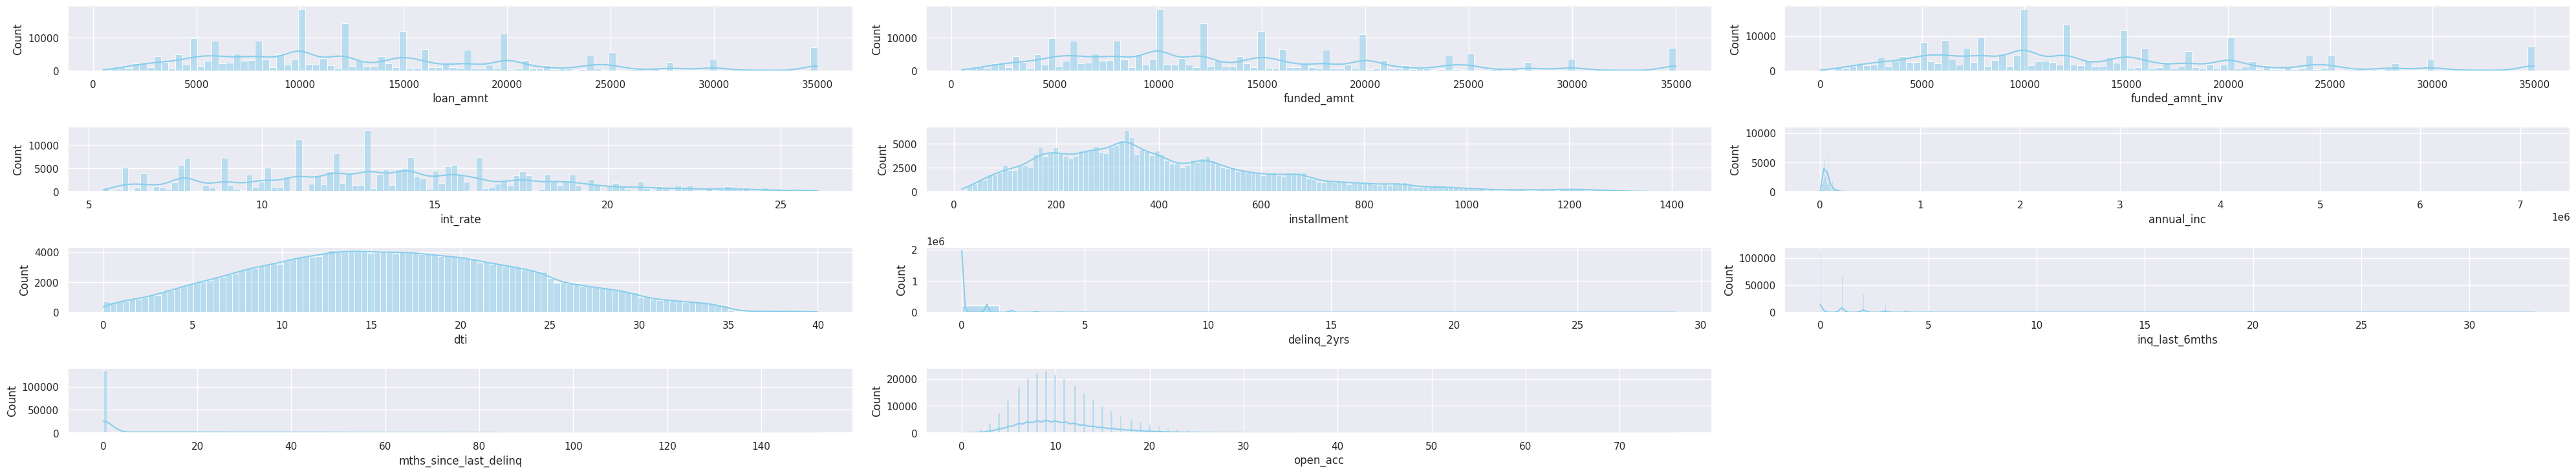

In [ ]:
# Visualisasi distribusi 11 kolom pertama menggunakan seaborn distplot
plt.figure(figsize=(40, 20))
for i in range(0, 11):
    plt.subplot(11, 3, i+1)
    sns.histplot(numeric_features.iloc[:, i], kde=True, color='skyblue')
plt.tight_layout()

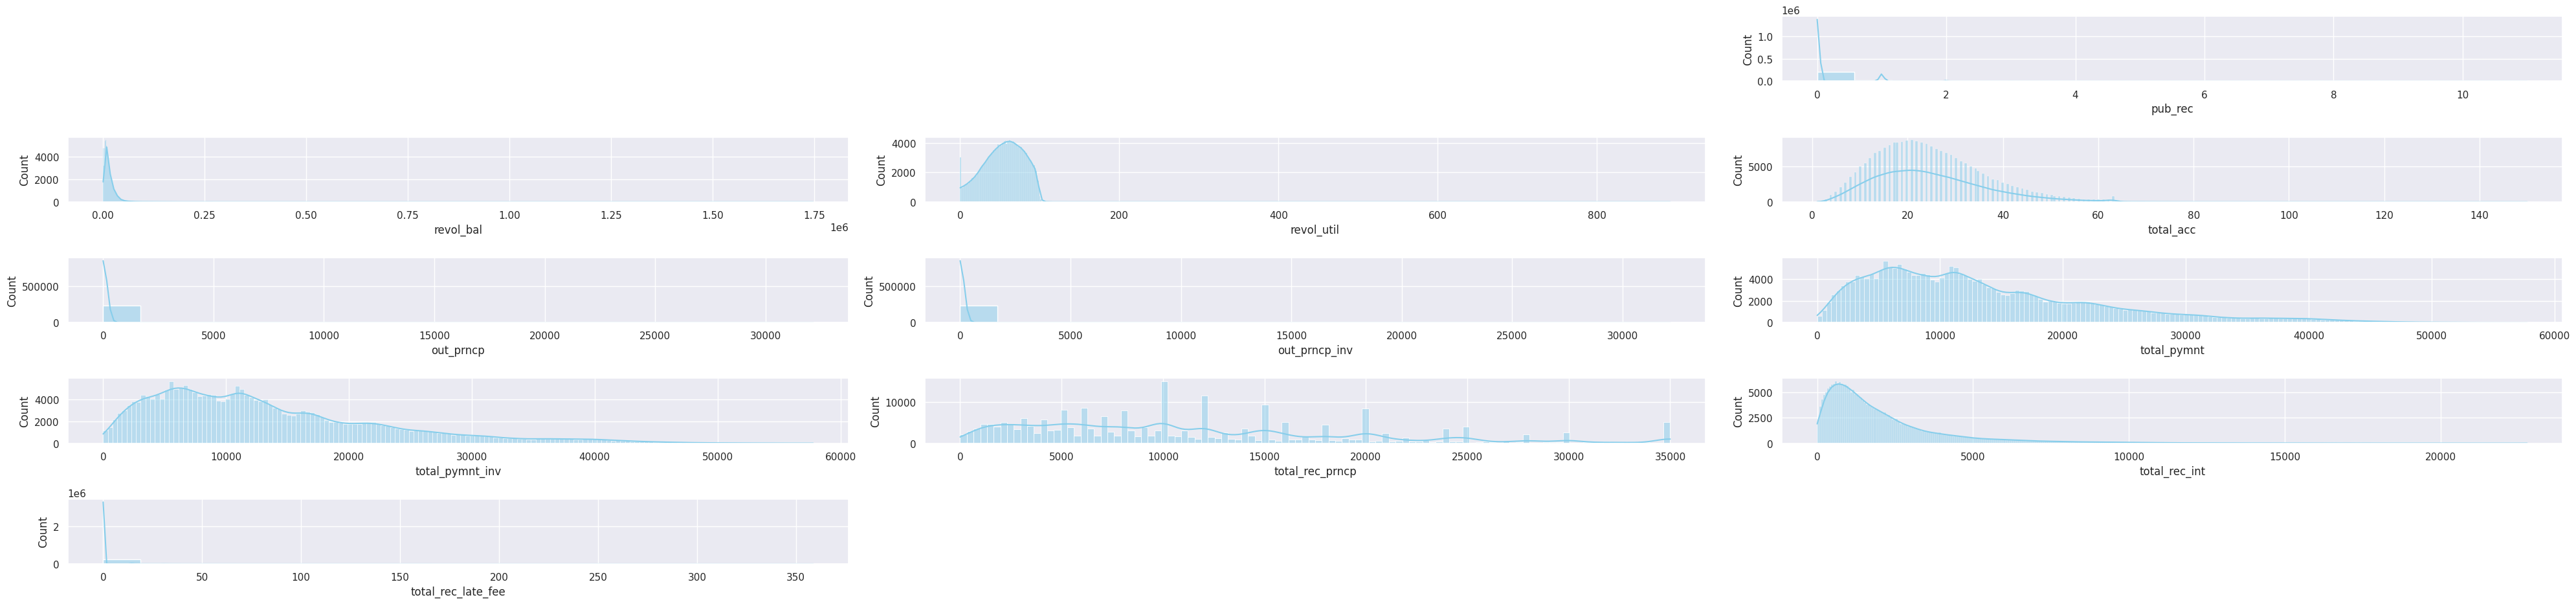

In [ ]:
# Visualisasi distribusi 11 kolom berikutnya (kolom ke-11 hingga ke-21)
plt.figure(figsize=(40, 20))
for i in range(11,22):
    plt.subplot(11, 3, i+1)
    sns.histplot(numeric_features.iloc[:, i], kde=True, color='skyblue')
plt.tight_layout()

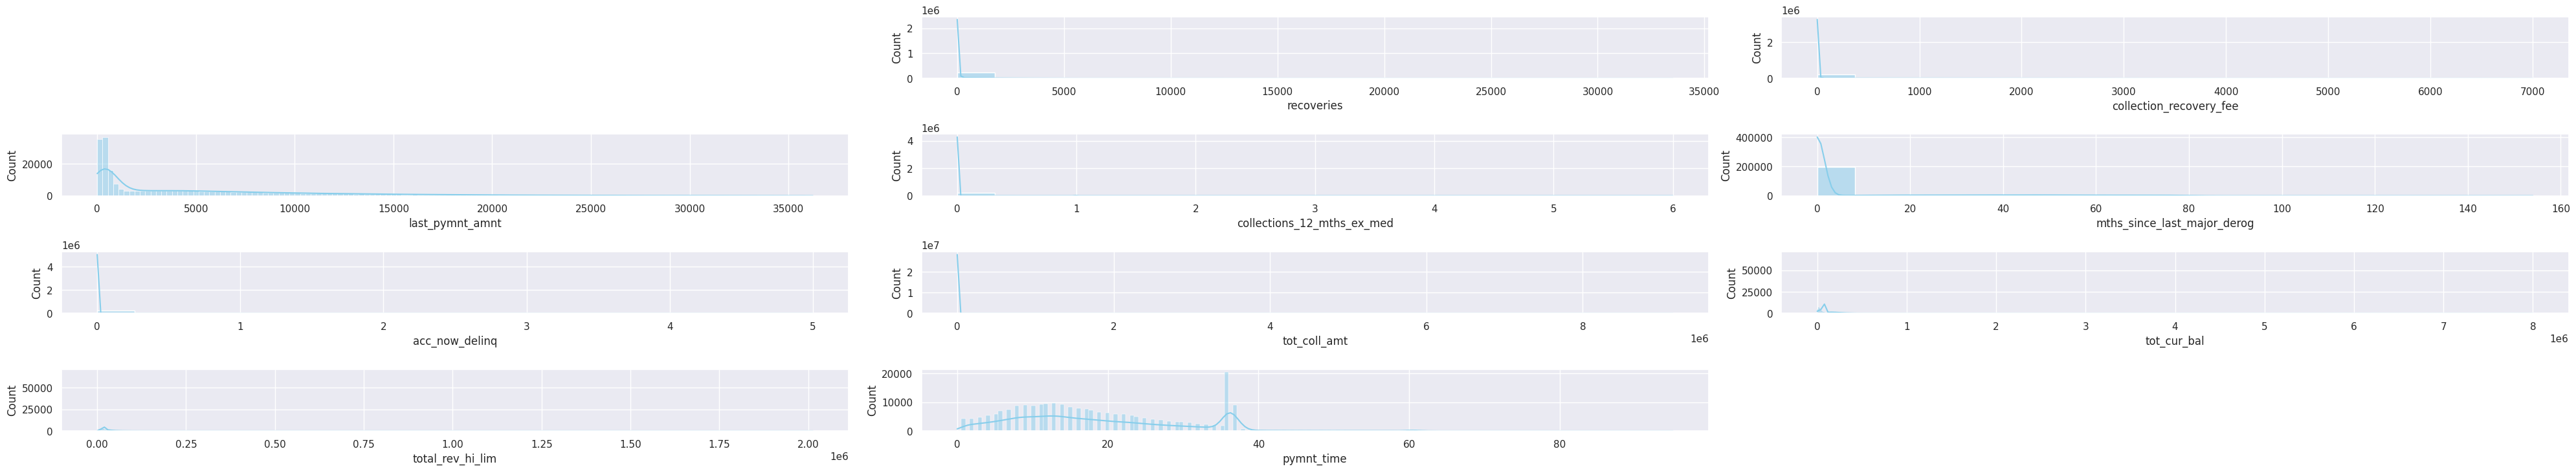

In [ ]:
# Visualisasi distribusi 11 kolom berikutnya (kolom ke-22 hingga ke-33)
plt.figure(figsize=(40, 20))
for i in range(22, 32):
    plt.subplot(11, 3, i+1)
    sns.histplot(numeric_features.iloc[:, i], kde=True, color='skyblue')
plt.tight_layout()

* Sebagian besar fitur memiliki distribusi yang tidak simetris (skewed).
* Fitur yang distribusinya tidak skewed (lebih normal/simetris):
`loan_amnt`, `funded_amnt`, `funded_amnt_inv`, `int_rate`, dan `dti`.

## Box Plot untuk mengecek outlier

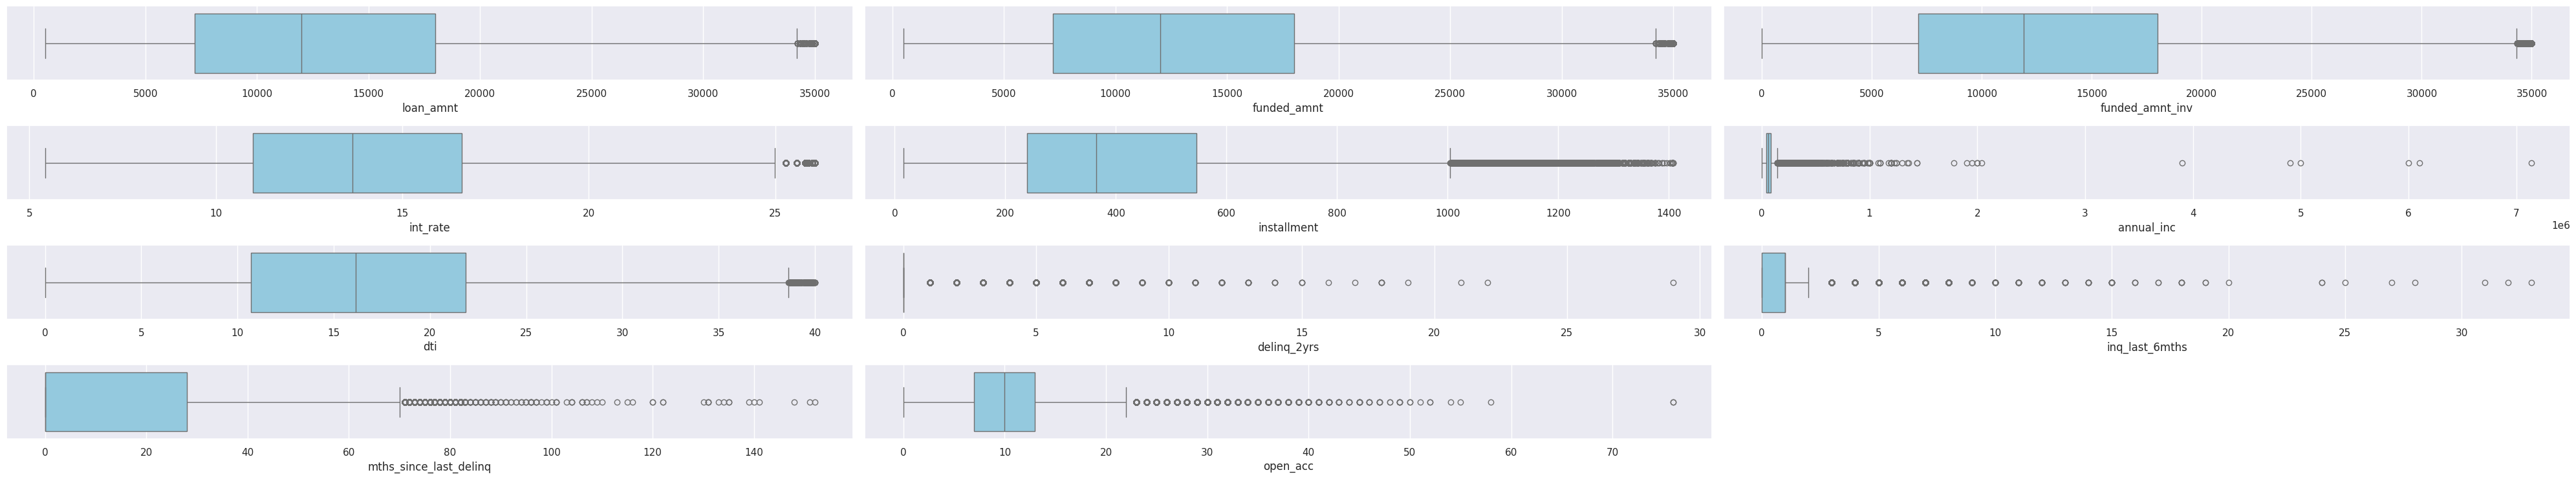

In [ ]:
# Visualisasi boxplot horizontal (kolom 0-11)
plt.figure(figsize=(40, 20))
for i in range(0, 11):
    plt.subplot(11, 3, i+1)
    sns.boxplot(numeric_features.iloc[:,i], color='skyblue',orient='y')
    plt.tight_layout()

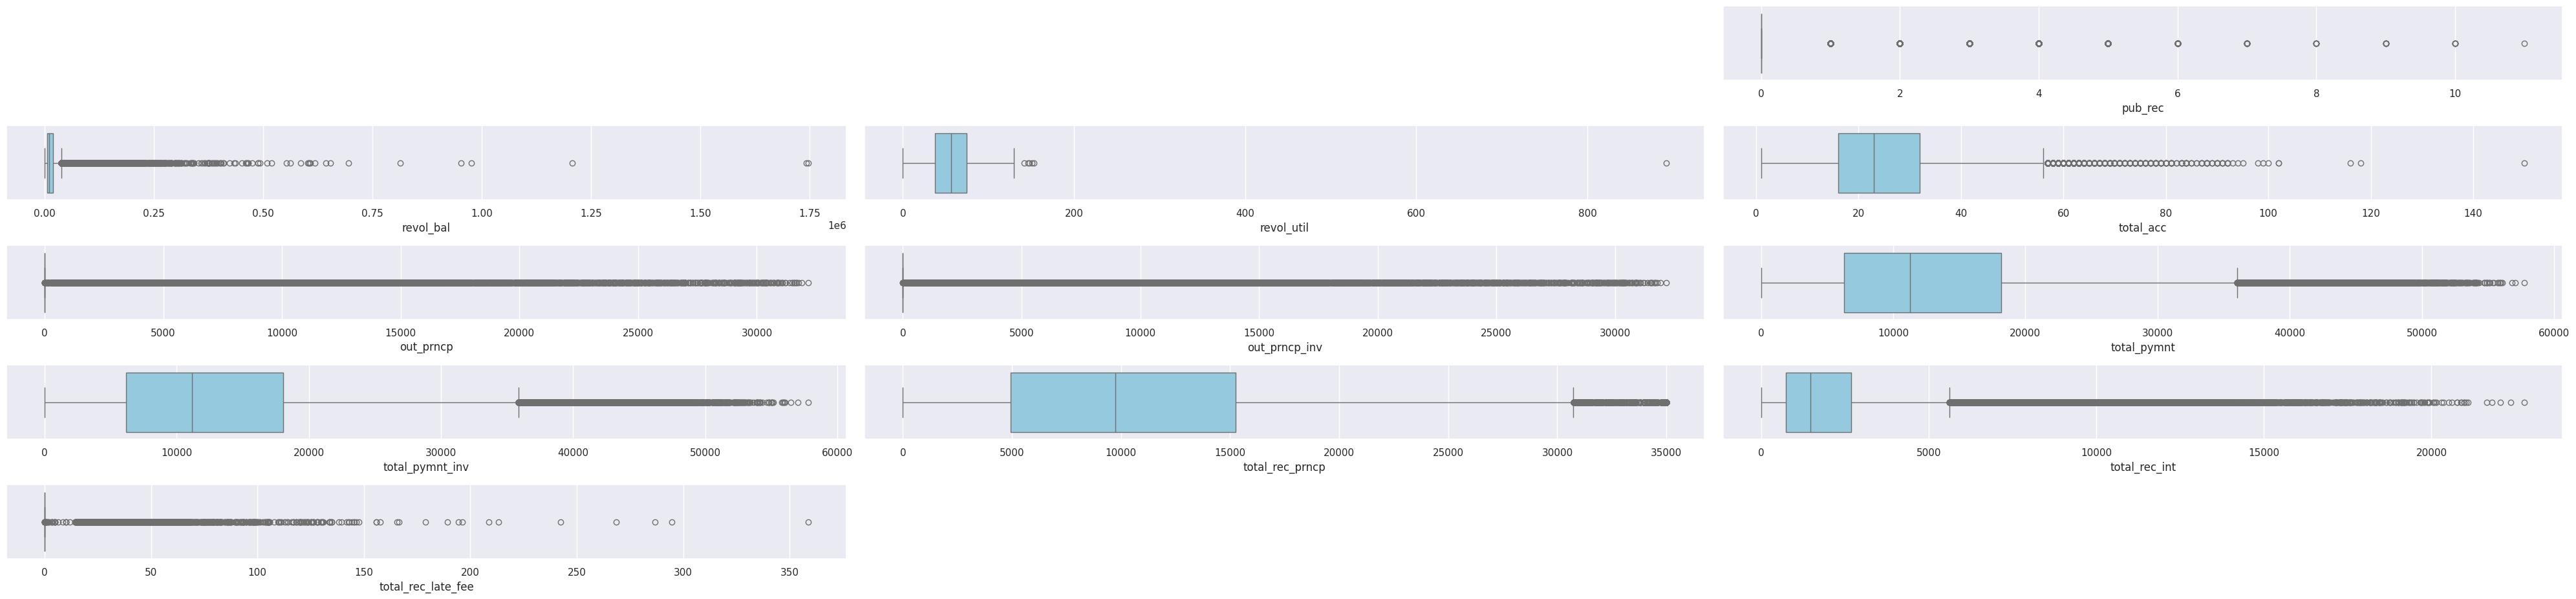

In [ ]:
# Visualisasi boxplot horizontal (kolom 11-22)
plt.figure(figsize=(40, 20))
for i in range(11, 22):
    plt.subplot(11, 3, i+1)
    sns.boxplot(numeric_features.iloc[:,i], color='skyblue',orient='y')
    plt.tight_layout()

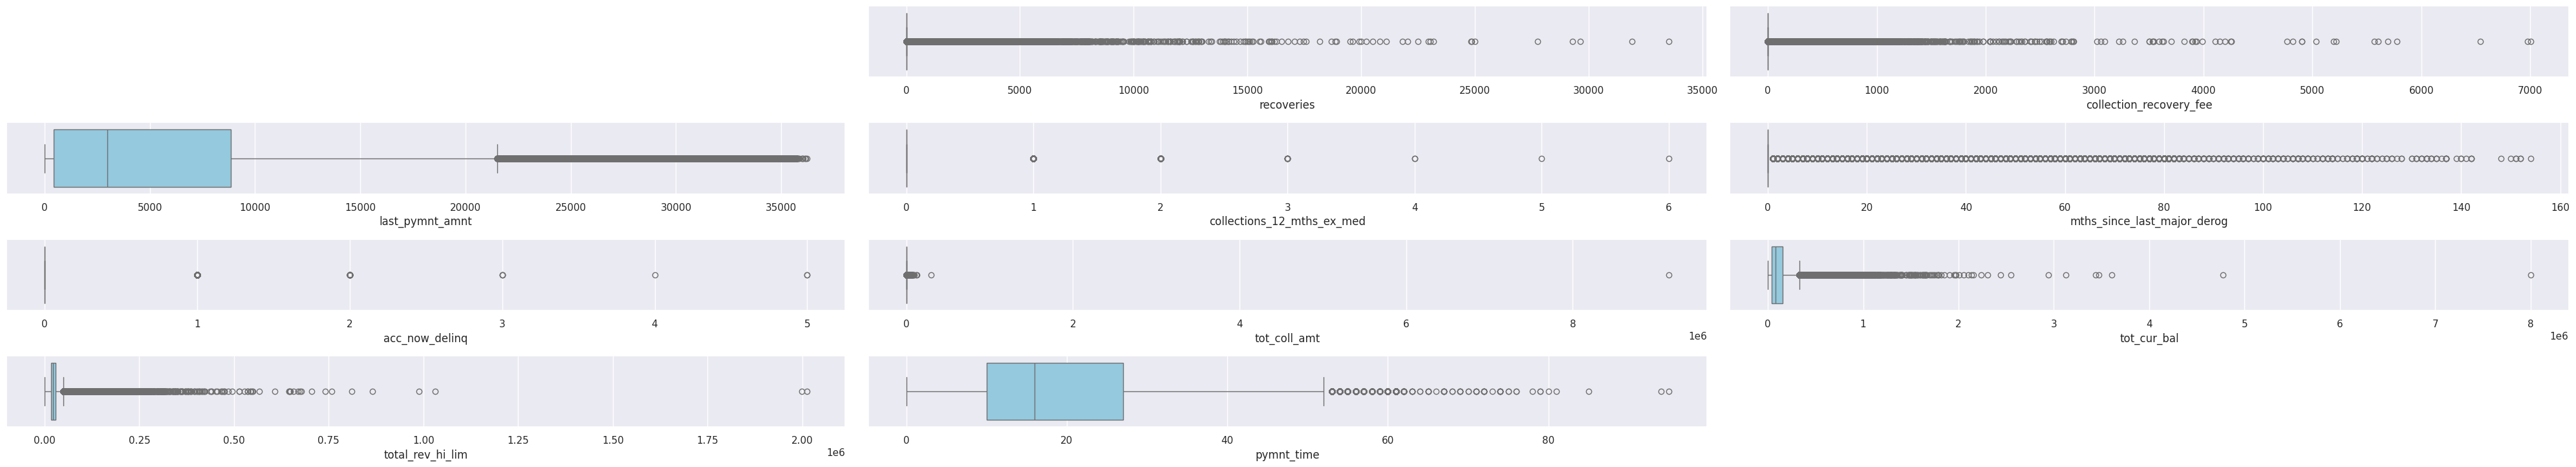

In [ ]:
# Visualisasi boxplot horizontal (kolom 22-33)
plt.figure(figsize=(40, 20))
for i in range(22, 32):
    plt.subplot(11, 3, i+1)
    sns.boxplot(numeric_features.iloc[:,i], color='skyblue',orient='y')
    plt.tight_layout()

Sebagian besar fitur memiliki outlier.

* Fitur yang tidak memiliki outlier:
* loan_amnt, funded_amnt, funded_amnt_inv, int_rate

Outlier parah :
* installment
* annual_inc
* open_acc
* revol_bal
* total_pymnt_inv
* out_prncp
* total_rec_late_fee
* out_prncp_inv
* total_rec_prncp
* total_pymnt
* total_acc
* total_rec_int
* last_pymnt_amnt
* total_rev_hi_lim
* recoveries
* total_coll_amt
* pymnt_time
* collection_recovery_fee
* tot_cur_bal
* credit_pull_year

## Analisis Korelasi untuk featur selection

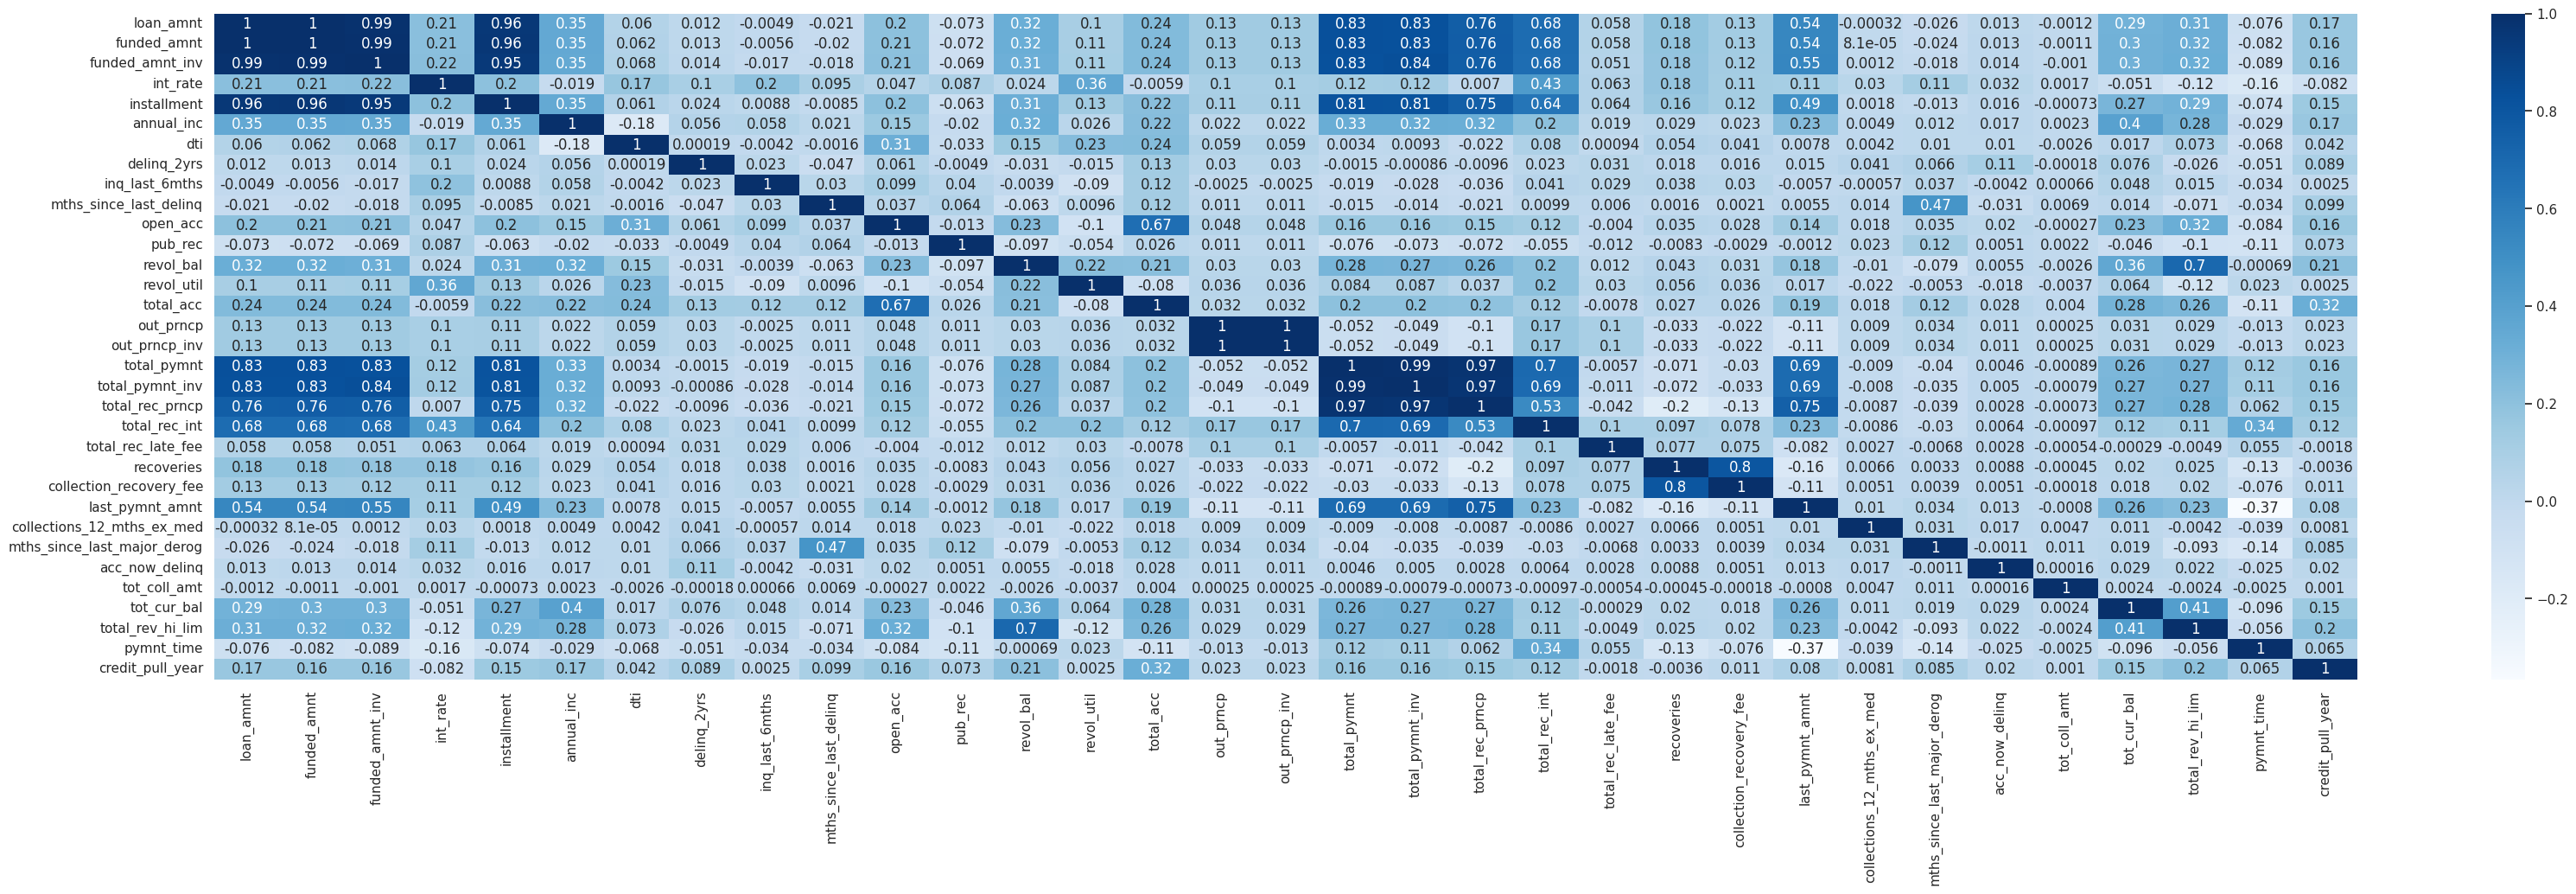

In [ ]:
# Membuat heatmap untuk menampilkan korelasi
fig = plt.figure(figsize = (40,10))
sns.heatmap(numeric_features.corr(),cmap='Blues', annot = True);

In [ ]:
data_cleaned.nunique()

,0
id,237695
member_id,237695
loan_amnt,1310
funded_amnt,1313
funded_amnt_inv,9558
term,2
int_rate,505
installment,43723
grade,7
sub_grade,35


In [ ]:
# Daftar kolom yang tidak relevan atau terlalu banyak nilai unik
irrelevant_cols = [
    'Unnamed: 0', 'id', 'member_id', 'policy_code',
    'emp_title', 'url', 'title', 'zip_code', 'earliest_cr_line'
]

In [ ]:
# Daftar kolom dengan potensi multikolinearitas atau terlalu banyak variasi nilai numerik
high_corr_or_redundant = [
    'last_credit_pull_d', 'last_pymnt_d', 'issue_d', 'addr_state', 'application_type',
    'out_prncp_inv', 'funded_amnt', 'total_pymnt_inv', 'funded_amnt_inv',
    'total_rec_prncp', 'out_prncp', 'revol_bal', 'total_pymnt', 'recoveries',
    'total_rec_int', 'total_acc', 'loan_amnt'
]

In [ ]:
# Gabungkan semua kolom yang akan dihapus
columns_to_remove = irrelevant_cols + high_corr_or_redundant

In [ ]:
# Versi lengkap: hapus kolom tidak relevan dan kolom multikolinear
data_cleaned_full = data_cleaned[data_cleaned.columns[~data_cleaned.columns.isin(columns_to_remove)]].reset_index(drop=True)

# Versi ringan: hanya hapus kolom tidak relevan (multikolinear tetap disimpan)
data_cleaned_partial = data_cleaned[data_cleaned.columns[~data_cleaned.columns.isin(irrelevant_cols)]].reset_index(drop=True)

In [ ]:
data_cleaned_full.head(2)

,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.0,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31
1,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.0,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14


In [ ]:
# Simpan versi lengkap (full) yang sudah dibersihkan dari kolom tidak relevan & multikolinear
data_cleaned_full.to_csv('/content/drive/MyDrive/Data Analyst & Data Scientist/ID X Partners/data_cleaned_full.csv', index=False)

# Simpan versi partial yang hanya menghapus kolom tidak relevan
data_cleaned_partial.to_csv('/content/drive/MyDrive/Data Analyst & Data Scientist/ID X Partners/data_cleaned_partial.csv', index=False)

print("Sukses menyimpan kedua file CSV ke Google Drive.")

Sukses menyimpan kedua file CSV ke Google Drive.


## Encoding Kategorikal

In [ ]:
data_cleaned_full = pd.read_csv('/content/drive/MyDrive/Data Analyst & Data Scientist/ID X Partners/data_cleaned_full.csv')
data_cleaned_full.head(5)

,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31
1,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14
2,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15
3,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19
4,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,1,n,wedding,11.20,0.0,3.0,0.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11


In [ ]:
data_cleaned_partial = pd.read_csv('/content/drive/MyDrive/Data Analyst & Data Scientist/ID X Partners/data_cleaned_partial.csv')
data_cleaned_partial.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,1,n,credit_card,AZ,27.65,0.0,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,2016-01-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,31
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,0,n,car,GA,1.00,0.0,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,16,14
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,1,n,small_business,IL,8.72,0.0,2.0,0.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,2016-01-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,30,15
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,1,n,other,CA,20.00,0.0,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,2015-01-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,19
4,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,1,n,wedding,AZ,11.20,0.0,3.0,0.0,9.0,0.0,7963,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,2015-01-01,161.03,2015-09-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,11


In [ ]:
data_cleaned_full['term'].unique()

array(['36 months', '60 months'], dtype=object)

In [ ]:
def text_num(text):
  return [int(s) for s in text.split() if s.isdigit()][0]

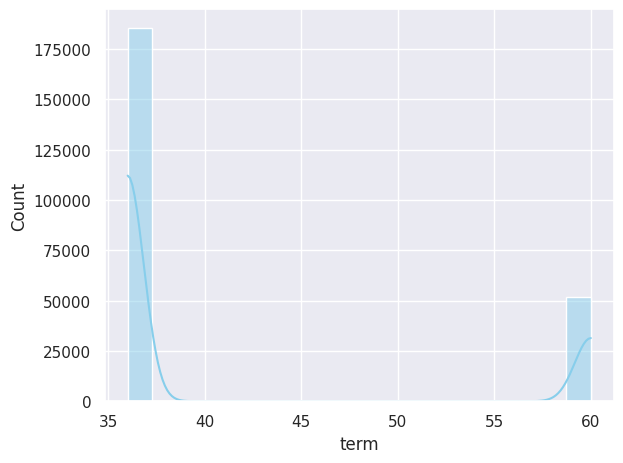

In [ ]:
sns.histplot(data_cleaned_full["term"].apply(lambda x: text_num(x)), kde=True, color='skyblue')
plt.tight_layout()
plt.show()

In [ ]:
data_cleaned_full['term'] = data_cleaned_full['term'].apply(lambda x: text_num(x))

In [ ]:
data_cleaned_full.head(5)

,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31
1,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14
2,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15
3,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19
4,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,1,n,wedding,11.20,0.0,3.0,0.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11


In [ ]:
data_cleaned_full['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [ ]:
# Buat dictionary untuk mengkodekan variabel ordinal 'grade'
grade_mapping = {
    'A': 6,
    'B': 5,
    'C': 4,
    'D': 3,
    'E': 2,
    'F': 1,
    'G': 0
}

# Terapkan pemetaan nilai ordinal ke kolom 'grade' dalam dataset data_cleaned_full
data_cleaned_full['grade'] = data_cleaned_full['grade'].map(grade_mapping)

In [ ]:
data_cleaned_full.head(5)

,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,36,10.65,162.87,5,B2,10+ years,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31
1,60,15.27,59.83,4,C4,< 1 year,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14
2,36,15.96,84.33,4,C5,10+ years,RENT,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15
3,36,13.49,339.31,4,C1,10+ years,RENT,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19
4,36,7.90,156.46,6,A4,3 years,RENT,36000.0,Source Verified,1,n,wedding,11.20,0.0,3.0,0.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11


In [ ]:

data_cleaned_full["sub_grade"].unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

In [ ]:
# Definisikan fungsi-fungsi untuk setiap kelompok sub_grade
def f_A(row):
    return {'A1': 1, 'A2': 2, 'A3': 3, 'A4': 4, 'A5': 5}.get(row, 0)

def f_B(row):
    return {'B1': 1, 'B2': 2, 'B3': 3, 'B4': 4, 'B5': 5}.get(row, 0)

def f_C(row):
    return {'C1': 1, 'C2': 2, 'C3': 3, 'C4': 4, 'C5': 5}.get(row, 0)

def f_D(row):
    return {'D1': 1, 'D2': 2, 'D3': 3, 'D4': 4, 'D5': 5}.get(row, 0)

def f_E(row):
    return {'E1': 1, 'E2': 2, 'E3': 3, 'E4': 4, 'E5': 5}.get(row, 0)

def f_F(row):
    return {'F1': 1, 'F2': 2, 'F3': 3, 'F4': 4, 'F5': 5}.get(row, 0)

def f_G(row):
    return {'G1': 1, 'G2': 2, 'G3': 3, 'G4': 4, 'G5': 5}.get(row, 0)

# Terapkan fungsi-fungsi di atas ke dataset
data_cleaned_full['SubGrade_A'] = data_cleaned_full['sub_grade'].apply(f_A)
data_cleaned_full['SubGrade_B'] = data_cleaned_full['sub_grade'].apply(f_B)
data_cleaned_full['SubGrade_C'] = data_cleaned_full['sub_grade'].apply(f_C)
data_cleaned_full['SubGrade_D'] = data_cleaned_full['sub_grade'].apply(f_D)
data_cleaned_full['SubGrade_E'] = data_cleaned_full['sub_grade'].apply(f_E)
data_cleaned_full['SubGrade_F'] = data_cleaned_full['sub_grade'].apply(f_F)
data_cleaned_full['SubGrade_G'] = data_cleaned_full['sub_grade'].apply(f_G)

In [ ]:
# Hapus kolom aslinya
data_cleaned_full.drop(columns='sub_grade', inplace=True)

In [ ]:
data_cleaned_full.head(5)

,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G
0,36,10.65,162.87,5,10+ years,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0
1,60,15.27,59.83,4,< 1 year,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0
2,36,15.96,84.33,4,10+ years,RENT,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0
3,36,13.49,339.31,4,10+ years,RENT,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0
4,36,7.90,156.46,6,3 years,RENT,36000.0,Source Verified,1,n,wedding,11.20,0.0,3.0,0.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11,4,0,0,0,0,0,0


In [ ]:
data_cleaned_full["emp_length"].unique()

array(['10+ years', '< 1 year', '3 years', '9 years', '4 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years'],
      dtype=object)

In [ ]:
# Buat kamus untuk encoding ordinal variabel emp_length
emp_length_dict = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

# Terapkan mapping ke data_cleaned_full
data_cleaned_full["emp_length"] = data_cleaned_full["emp_length"].map(emp_length_dict)

In [ ]:
data_cleaned_full["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [ ]:
data_cleaned_full["home_ownership"].value_counts()

,count
home_ownership,
MORTGAGE,116769
RENT,100703
OWN,19995
OTHER,179
NONE,48
ANY,1


* ANY, OTHER, dan NONE akan digabungkan ke dalam kategori OTHER.
* Setelah itu, saya menggunakan One-Hot-Encoding untuk fitur ini.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Inisialisasi encoder
encoder = OneHotEncoder(sparse_output=False)

# Gabungkan nilai 'ANY', 'OTHER', dan 'NONE' menjadi 'OTHER'
data_cleaned_full['home_ownership'] = data_cleaned_full['home_ownership'].replace(['ANY', 'OTHER', 'NONE'], 'OTHER')

# Transformasi one-hot encoding
df_encoded = pd.DataFrame(encoder.fit_transform(data_cleaned_full[['home_ownership']]))

# Ganti nama kolom hasil encoding
df_encoded.columns = encoder.get_feature_names_out(['home_ownership'])

# Gabungkan hasil encoding dengan data utama
data_cleaned_full = pd.concat([data_cleaned_full, df_encoded], axis=1)

# Hapus kolom asli
data_cleaned_full.drop(['home_ownership'], axis=1, inplace=True)

# Lihat hasil
data_cleaned_full.head()

,term,int_rate,installment,grade,emp_length,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,36,10.65,162.87,5,10,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,0.0,0.0,0.0,1.0
1,60,15.27,59.83,4,0,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,0.0,0.0,0.0,1.0
2,36,15.96,84.33,4,10,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0,0.0,0.0,0.0,1.0
3,36,13.49,339.31,4,10,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0
4,36,7.90,156.46,6,3,36000.0,Source Verified,1,n,wedding,11.20,0.0,3.0,0.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11,4,0,0,0,0,0,0,0.0,0.0,0.0,1.0


In [ ]:
# Cek nilai unik dalam kolom 'verification_status'
data_cleaned_full["verification_status"].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [ ]:
# Cek distribusi jumlah setiap kategori
data_cleaned_full["verification_status"].value_counts()

,count
verification_status,
Verified,88337
Not Verified,82760
Source Verified,66598


In [ ]:
# Inisialisasi OneHotEncoder (versi terbaru sklearn)
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

# Transformasi kolom 'verification_status' menjadi bentuk one-hot encoding
df_encoded = pd.DataFrame(encoder.fit_transform(data_cleaned_full[["verification_status"]]))

# Ganti nama kolom hasil encoding sesuai kategori aslinya
df_encoded.columns = encoder.get_feature_names_out(["verification_status"])

# Gabungkan data hasil encoding ke dataframe utama
data_cleaned_full = pd.concat([data_cleaned_full, df_encoded], axis=1)

# Hapus kolom 'verification_status' yang sudah diubah
data_cleaned_full.drop(["verification_status"], axis=1, inplace=True)

# Tampilkan 5 baris pertama hasil akhir
data_cleaned_full.head()

,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,36,10.65,162.87,5,10,24000.0,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,60,15.27,59.83,4,0,30000.0,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,36,15.96,84.33,4,10,12252.0,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,36,13.49,339.31,4,10,49200.0,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,36,7.90,156.46,6,3,36000.0,1,n,wedding,11.20,0.0,3.0,0.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11,4,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
# Lihat nilai unik dalam kolom 'pymnt_plan'
data_cleaned_full['pymnt_plan'].unique()

array(['n', 'y'], dtype=object)

In [ ]:
# Buat dictionary untuk mengkodekan nilai ordinal
pymnt_plan_dict = {'n': 0, 'y': 1}

# Terapkan mapping ke kolom 'pymnt_plan'
data_cleaned_full['pymnt_plan'] = data_cleaned_full['pymnt_plan'].map(pymnt_plan_dict)

# Lihat hasil setelah encoding
data_cleaned_full.head()

,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,36,10.65,162.87,5,10,24000.0,1,0,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,60,15.27,59.83,4,0,30000.0,0,0,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,36,15.96,84.33,4,10,12252.0,1,0,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,36,13.49,339.31,4,10,49200.0,1,0,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,36,7.90,156.46,6,3,36000.0,1,0,wedding,11.20,0.0,3.0,0.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11,4,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
data_cleaned_full["loan_status"].unique()

array([1, 0])

In [ ]:
data_cleaned_full["purpose"].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [ ]:
data_cleaned_full["purpose"].value_counts()

,count
purpose,
debt_consolidation,138318
credit_card,47421
home_improvement,13824
other,13635
major_purchase,5951
small_business,4766
car,3498
medical,2706
wedding,2017


* `home_improvement, car, medical, wedding, moving, house, vacation, educational` dapat digabungkan ke dalam kategori private_use
* `renewable_energy` dapat digabungkan ke dalam kategori other.

In [ ]:
# Definisikan dictionary untuk mengelompokkan variabel purpose
target_dict = {
    'debt_consolidation': 'debt_consolidation',
    'credit_card': 'credit_card',
    'home_improvement': 'private_use',
    'other': 'other',
    'major_purchase': 'major_purchase',
    'small_business': 'small_business',
    'car': 'private_use',
    'medical': 'private_use',
    'wedding': 'private_use',
    'moving': 'private_use',
    'house': 'private_use',
    'vacation': 'private_use',
    'educational': 'private_use',
    'renewable_energy': 'other'
}

# Terapkan mapping ke kolom purpose
data_cleaned_full["purpose"] = data_cleaned_full["purpose"].map(target_dict)

In [ ]:
# Cek hasil jumlah masing-masing kategori setelah agregasi
print(data_cleaned_full["purpose"].value_counts())


purpose
debt_consolidation    138318
credit_card            47421
private_use            27348
other                  13891
major_purchase          5951
small_business          4766
Name: count, dtype: int64


In [ ]:
# One-hot encoding untuk kolom purpose
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # gunakan sparse_output untuk versi terbaru sklearn

df_encoded = pd.DataFrame(encoder.fit_transform(data_cleaned_full[["purpose"]]))
df_encoded.columns = encoder.get_feature_names_out(["purpose"])

# Gabungkan hasil encoding ke dataset utama
data_cleaned_full = pd.concat([data_cleaned_full, df_encoded], axis=1)

# Hapus kolom asli
data_cleaned_full.drop(["purpose"], axis=1, inplace=True)

# Tampilkan hasil awal
data_cleaned_full.head()

,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_major_purchase,purpose_other,purpose_private_use,purpose_small_business
0,36,10.65,162.87,5,10,24000.0,1,0,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,60,15.27,59.83,4,0,30000.0,0,0,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,36,15.96,84.33,4,10,12252.0,1,0,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,36,13.49,339.31,4,10,49200.0,1,0,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,36,7.90,156.46,6,3,36000.0,1,0,11.20,0.0,3.0,0.0,9.0,0.0,28.3,f,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11,4,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
data_cleaned_full["initial_list_status"].unique()

array(['f', 'w'], dtype=object)

In [ ]:
# Transformasi one-hot encoding
encoded_df = pd.DataFrame(encoder.fit_transform(data_cleaned_full[["initial_list_status"]]))

# Ganti nama kolom hasil encoding
encoded_df.columns = encoder.get_feature_names_out(["initial_list_status"])

# Gabungkan hasil encoding dengan data utama
data_cleaned_full = pd.concat([data_cleaned_full, encoded_df], axis=1)

# Hapus kolom asli
data_cleaned_full.drop(["initial_list_status"], axis=1, inplace=True)

# Tampilkan hasil awal
data_cleaned_full.head()

,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_major_purchase,purpose_other,purpose_private_use,purpose_small_business,initial_list_status_f,initial_list_status_w
0,36,10.65,162.87,5,10,24000.0,1,0,27.65,0.0,1.0,0.0,3.0,0.0,83.7,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,60,15.27,59.83,4,0,30000.0,0,0,1.00,0.0,5.0,0.0,3.0,0.0,9.4,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,36,15.96,84.33,4,10,12252.0,1,0,8.72,0.0,2.0,0.0,2.0,0.0,98.5,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,36,13.49,339.31,4,10,49200.0,1,0,20.00,0.0,1.0,35.0,10.0,0.0,21.0,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,36,7.90,156.46,6,3,36000.0,1,0,11.20,0.0,3.0,0.0,9.0,0.0,28.3,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11,4,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
data_cleaned_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237695 entries, 0 to 237694
Data columns (total 48 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   term                                 237695 non-null  int64  
 1   int_rate                             237695 non-null  float64
 2   installment                          237695 non-null  float64
 3   grade                                237695 non-null  int64  
 4   emp_length                           237695 non-null  int64  
 5   annual_inc                           237695 non-null  float64
 6   loan_status                          237695 non-null  int64  
 7   pymnt_plan                           237695 non-null  int64  
 8   dti                                  237695 non-null  float64
 9   delinq_2yrs                          237695 non-null  float64
 10  inq_last_6mths                       237695 non-null  float64
 11  mths_since_la

In [ ]:
# Simpan versi lengkap (full) yang sudah di preprocessing
data_cleaned_full.to_csv('/content/drive/MyDrive/Data Analyst & Data Scientist/ID X Partners/data_cleaned_full_prep.csv', index=False)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Analyst & Data Scientist/ID X Partners/data_cleaned_full_prep.csv')

## **Menangani Outlier**

In [ ]:
# Cek nilai unik dari beberapa variabel numerik
print("delinq_2yrs:", data['delinq_2yrs'].unique())
print("inq_last_6mths:", data['inq_last_6mths'].unique())
print("open_acc:", data['open_acc'].unique())

delinq_2yrs: [ 0.  2.  3.  1.  4.  6.  5.  8.  7.  9. 11. 13. 15. 10. 17. 18. 12. 29.
 14. 21. 22. 16. 19.]
inq_last_6mths: [ 1.  5.  2.  3.  0.  4.  6.  7.  8.  9. 10. 11. 12. 15. 14. 33. 17. 32.
 24. 13. 18. 16. 31. 28. 25. 27. 20. 19.]
open_acc: [ 3.  2. 10.  9.  4. 11. 14. 12. 20.  8.  7.  6. 15. 17.  5. 13. 16. 30.
 21. 18. 19. 27. 23. 34. 25. 22. 24. 26. 32. 29. 28. 33. 31. 39. 35. 36.
 38. 44. 41. 42.  1. 46. 37. 47. 40. 49. 45. 43.  0. 48. 50. 52. 76. 55.
 58. 54. 51.]


In [ ]:
# Tampilkan nilai unik dari mths_since_last_major_derog
print("mths_since_last_major_derog:", data['mths_since_last_major_derog'].unique())


mths_since_last_major_derog: [  0.  53.  69.  71.  59.  62.  39.  70.  11.  49.  34.  74.  60.  45.
  51.  48.  10.  27.  22.  57.  56.  61.  35.  23.  58.  25.  46.  63.
  33.  47.  28.  21.  41.  50.  52.  80.  68.  65.  30.  26.  75.  16.
  32.  73.  14.   5.  67.  13.  29.  19.  40.  64.  44.  38.  54.   4.
   9.  24.  42.  94.  37.  66.  79.  36.   8. 110.  17.  31.   1.  76.
  81.  84.  18.  20.  43.   7.  78.  55.  15.   2.  72.  77.   3.  82.
 100.  12. 111. 102.   6.  93. 135. 152.  92.  88.  83.  87. 122.  86.
  91. 134.  89.  99.  96. 119. 101. 109.  85. 113. 120. 139. 106. 131.
  95.  90. 141. 115. 116. 148. 104. 105. 137.  98. 114. 128. 133. 154.
 121. 107. 151. 103. 118. 108. 142.  97. 125. 132. 112. 123. 126. 136.
 127. 130. 140. 117. 124. 150.]


In [ ]:
# Hitung jumlah nilai unik dari mths_since_last_major_derog
print("Jumlah nilai unik mths_since_last_major_derog:", len(data['mths_since_last_major_derog'].unique()))

Jumlah nilai unik mths_since_last_major_derog: 146


In [ ]:
# Fitur pub_rec memiliki range terbatas, bukan fitur numerik murni
print("Nilai unik 'pub_rec':", data['pub_rec'].unique())


Nilai unik 'pub_rec': [ 0.  1.  2.  3.  4.  5.  6.  9.  8.  7. 10. 11.]


In [ ]:
# Fitur collections_12_mths_ex_med memiliki range terbatas
print("Nilai unik 'collections_12_mths_ex_med':", data['collections_12_mths_ex_med'].unique())

Nilai unik 'collections_12_mths_ex_med': [0. 1. 2. 4. 3. 6. 5.]


In [ ]:
# Fitur acc_now_delinq juga memiliki range terbatas
print("Nilai unik 'acc_now_delinq':", data['acc_now_delinq'].unique())

Nilai unik 'acc_now_delinq': [0. 1. 2. 3. 5. 4.]


In [ ]:
# Fungsi untuk menghapus outlier berdasarkan IQR
def subset_by_iqr(df, column):
    """
    Menghapus outlier dari dataframe berdasarkan kolom menggunakan metode IQR.
    Data yang berada di bawah Q1 - 1.5*IQR atau di atas Q3 + 1.5*IQR akan dihapus.
    """
    whisker_width = 1.5
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    filter = (df[column] >= q1 - whisker_width * iqr) & (df[column] <= q3 + whisker_width * iqr)
    return df.loc[filter].reset_index(drop=True)

In [ ]:
#kolom numerik
numerical = ['int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc',
             'revol_util','total_rec_late_fee','collection_recovery_fee','last_pymnt_amnt','mths_since_last_major_derog','tot_coll_amt',
             'tot_cur_bal','total_rev_hi_lim','pymnt_time','credit_pull_year']

#kolom yang memiliki outlier parah
outlier = ['installment','annual_inc','open_acc','total_rec_late_fee','last_pymnt_amnt','total_rev_hi_lim',
           'tot_coll_amt','collection_recovery_fee','tot_cur_bal','pymnt_time','credit_pull_year']

In [ ]:
# Contoh penggunaan untuk whiskers = 1.5, sesuai permintaan
print(f'Jumlah baris sebelum menghapus outlier: {len(data)}')

for col in outlier:
    data_aft_out = subset_by_iqr(data, col)

print(f'Jumlah baris setelah menghapus outlier: {len(data_aft_out)}')

Jumlah baris sebelum menghapus outlier: 237695
Jumlah baris setelah menghapus outlier: 230237


## Spliting Data

In [ ]:
# Pisahkan fitur dan target dari data_aft_out
data_feat = data_aft_out.loc[:, data_aft_out.columns != "loan_status"]
data_target = data_aft_out["loan_status"]

In [ ]:
# Simpan sebagai file CSV
data_feat.to_csv('/content/drive/MyDrive/Data Analyst & Data Scientist/ID X Partners/data_feat.csv', index=False)
data_target.to_csv('/content/drive/MyDrive/Data Analyst & Data Scientist/ID X Partners/data_target.csv', index=False)

Saya membaginya menjadi 75% Training dan 25% Testing

In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split

# Split data dengan stratifikasi dan test_size 25%
X_train, X_test, y_train, y_test = train_test_split(
    data_feat, data_target,
    test_size=0.25,
    random_state=42,
    stratify=data_target
)

In [ ]:
# Cek distribusi label
print('Class from training data:', Counter(y_train))
print('Class from testing data:', Counter(y_test))

Class from training data: Counter({1: 135620, 0: 37057})
Class from testing data: Counter({1: 45208, 0: 12352})


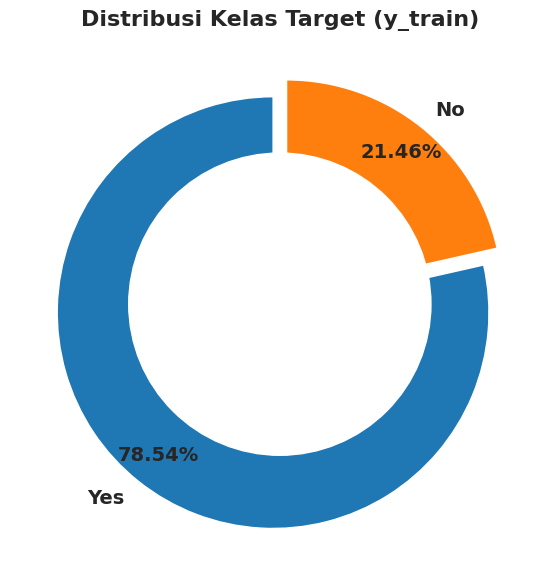

In [ ]:
import matplotlib.pyplot as plt

# Hitung proporsi kelas
class_counts = y_train.value_counts()
labels = ["Yes", "No"]
colors = ["#1f77b4", "#ff7f0e"]  # warna biru dan oranye modern
explode = [0.05, 0.05]  # pisahkan kedua bagian untuk efek donut

# Buat donut chart
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    class_counts,
    labels=labels,
    autopct='%.2f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    pctdistance=0.85,
    textprops={'fontsize': 14, 'weight': 'bold'}
)

# Tambahkan lingkaran putih di tengah untuk membuat donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Tambahkan judul
plt.title("Distribusi Kelas Target (y_train)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# **Explanatory Data Analysis (EDA)**

In [ ]:
data_cleaned = pd.read_csv('/content/drive/MyDrive/Data Analyst & Data Scientist/ID X Partners/data_cleaned.csv')
data_cleaned.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,2016-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,31
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,0,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,16,14
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01,2.0,0.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,2016-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,30,15
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,1996-02-01,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,2015-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,19
4,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,2004-11-01,3.0,0.0,9.0,0.0,7963,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,2015-01-01,161.03,2015-09-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,11


#### **Distribusi Pinjaman Berdasarkan Verification Status**

<ipython-input-116-3d9e218a60f9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x='verification_status', y='loan_amnt', palette='Set2')


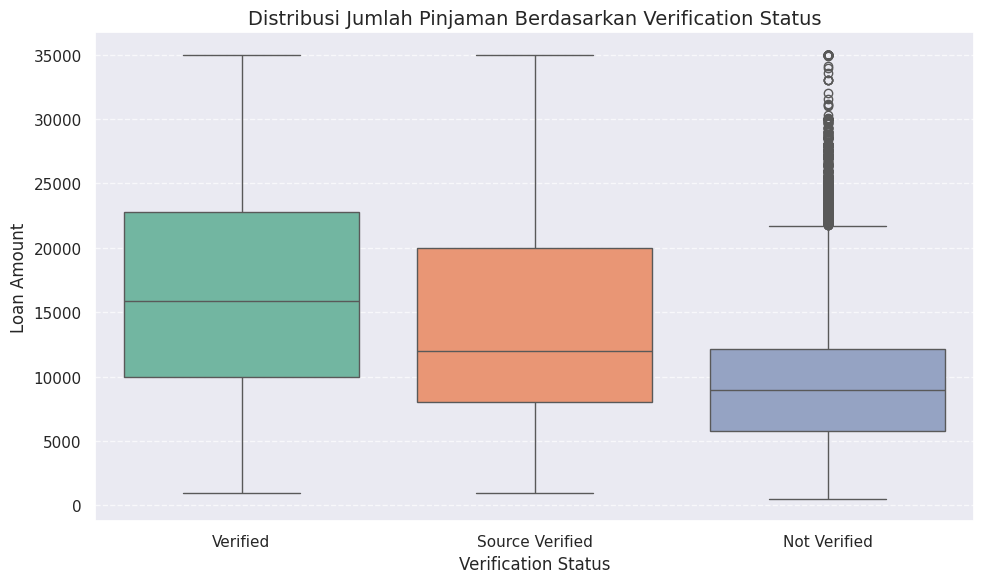

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Jika dataset sudah dimuat sebagai data_cleaned
plt.figure(figsize=(10,6))
sns.boxplot(data=data_cleaned, x='verification_status', y='loan_amnt', palette='Set2')
plt.title('Distribusi Jumlah Pinjaman Berdasarkan Verification Status', fontsize=14)
plt.xlabel('Verification Status')
plt.ylabel('Loan Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### **Jumlah Pinjaman Berdasarkan State (addr_state)**

<ipython-input-117-b5cc1967de2c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_loan.index, y=state_loan.values, palette='viridis')


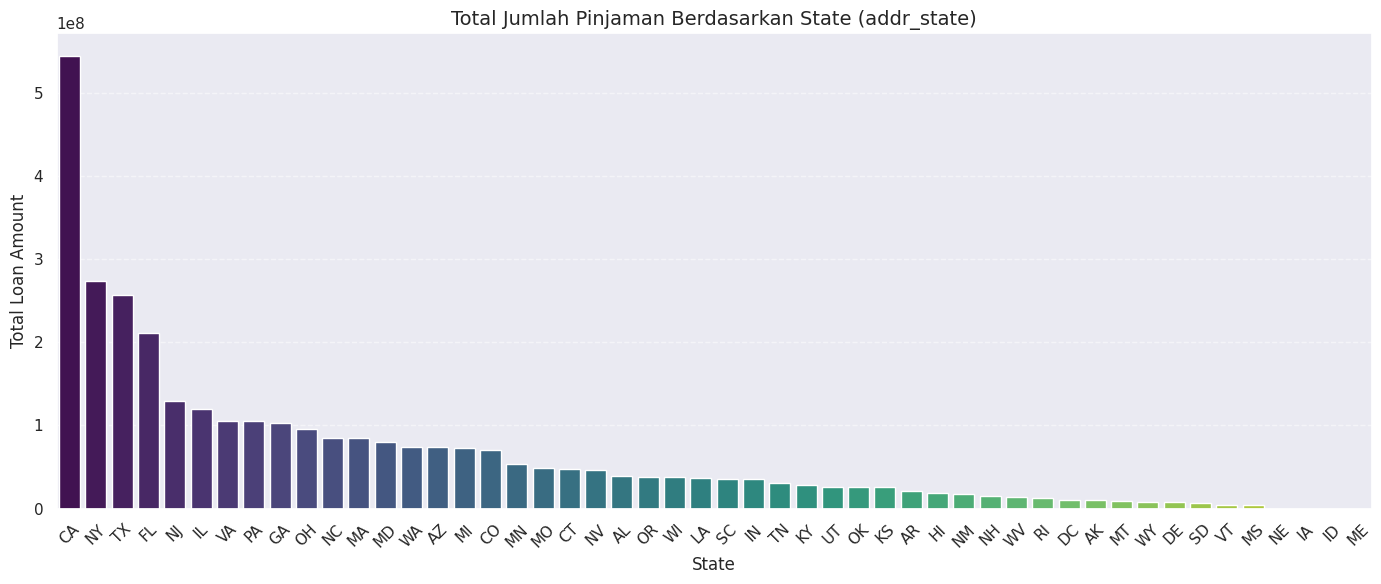

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat figure
plt.figure(figsize=(14, 6))

# Buat barplot total pinjaman per state
state_loan = data_cleaned.groupby('addr_state')['loan_amnt'].sum().sort_values(ascending=False)
sns.barplot(x=state_loan.index, y=state_loan.values, palette='viridis')

# Tambahkan label dan judul
plt.title('Total Jumlah Pinjaman Berdasarkan State (addr_state)', fontsize=14)
plt.xlabel('State')
plt.ylabel('Total Loan Amount')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### **Analisis Tingkat Keterlambatan Pembayaran**

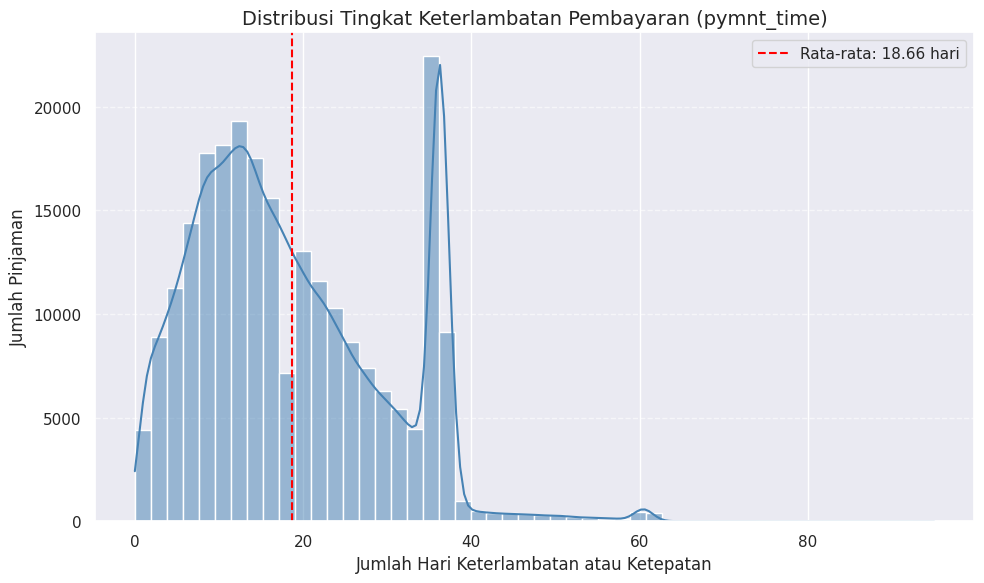

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi keterlambatan pembayaran
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['pymnt_time'], bins=50, kde=True, color='steelblue')

# Tambahkan garis vertikal rata-rata keterlambatan
mean_delay = data_cleaned['pymnt_time'].mean()
plt.axvline(mean_delay, color='red', linestyle='--', label=f'Rata-rata: {mean_delay:.2f} hari')

# Judul dan label
plt.title('Distribusi Tingkat Keterlambatan Pembayaran (pymnt_time)', fontsize=14)
plt.xlabel('Jumlah Hari Keterlambatan atau Ketepatan')
plt.ylabel('Jumlah Pinjaman')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### **10 Tujuan Peminjaman (Purpose) dengan Jumlah Pinjaman Terbanyak**

<ipython-input-119-37a23bc8659f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_purpose.values, y=top_purpose.index, palette='mako')


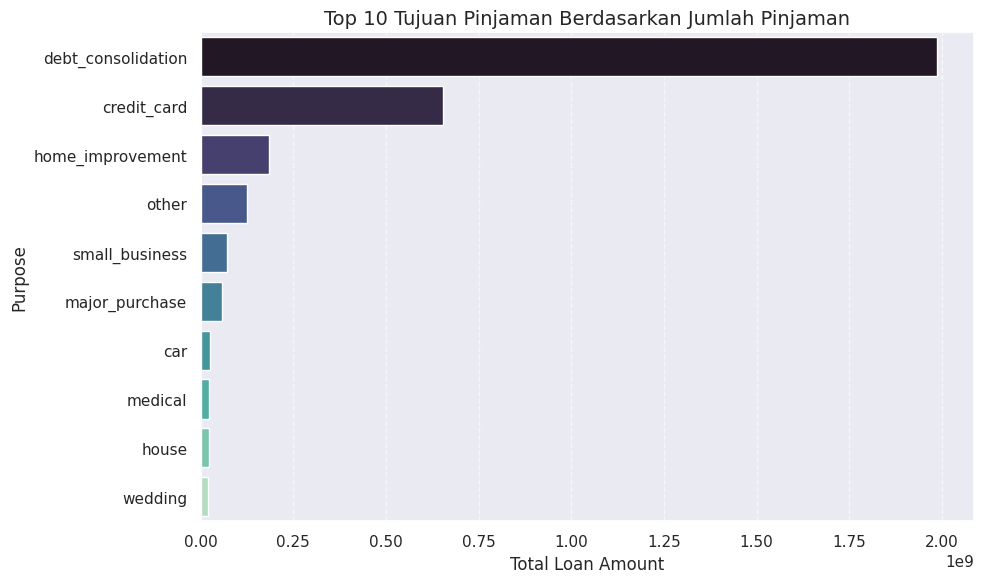

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung total loan per purpose
top_purpose = data_cleaned.groupby('purpose')['loan_amnt'].sum().sort_values(ascending=False).head(10)

# Buat barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_purpose.values, y=top_purpose.index, palette='mako')

# Tambahkan label dan judul
plt.title('Top 10 Tujuan Pinjaman Berdasarkan Jumlah Pinjaman', fontsize=14)
plt.xlabel('Total Loan Amount')
plt.ylabel('Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# **Modeling**

In [ ]:
data_feat = pd.read_csv('/content/drive/MyDrive/Data Analyst & Data Scientist/ID X Partners/data_feat.csv')
data_feat.head()

,term,int_rate,installment,grade,emp_length,annual_inc,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_major_purchase,purpose_other,purpose_private_use,purpose_small_business,initial_list_status_f,initial_list_status_w
0,36,10.65,162.87,5,10,24000.0,0,27.65,0.0,1.0,0.0,3.0,0.0,83.7,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,60,15.27,59.83,4,0,30000.0,0,1.00,0.0,5.0,0.0,3.0,0.0,9.4,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,36,15.96,84.33,4,10,12252.0,0,8.72,0.0,2.0,0.0,2.0,0.0,98.5,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,36,13.49,339.31,4,10,49200.0,0,20.00,0.0,1.0,35.0,10.0,0.0,21.0,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,36,7.90,156.46,6,3,36000.0,0,11.20,0.0,3.0,0.0,9.0,0.0,28.3,0.00,0.00,161.03,0.0,0.0,0.0,0.0,81539.0,22800.0,37,11,4,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
data_target = pd.read_csv('/content/drive/MyDrive/Data Analyst & Data Scientist/ID X Partners/data_target.csv')
data_target = data_target["loan_status"]

In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split

# Split data dengan stratifikasi dan test_size 25%
X_train, X_test, y_train, y_test = train_test_split(
    data_feat, data_target,
    test_size=0.25,
    random_state=42,
    stratify=data_target
)

In [ ]:
# Cek distribusi label
print('Class from training data:', Counter(y_train))
print('Class from testing data:', Counter(y_test))

Class from training data: Counter({1: 135620, 0: 37057})
Class from testing data: Counter({1: 45208, 0: 12352})


In [ ]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [ ]:
!pip install imbalanced-learn

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import numpy as np

# Fungsi log transform
def log_transform(x):
    return np.log(x + 1)

# Daftar fitur numerik
numerical = ['int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc',
             'revol_util','total_rec_late_fee','collection_recovery_fee','last_pymnt_amnt','mths_since_last_major_derog',
             'tot_coll_amt','tot_cur_bal','total_rev_hi_lim','pymnt_time','credit_pull_year']

# Fitur yang distribusinya skewed → butuh log transform
skewed = ['installment','annual_inc','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc',
          'revol_util','total_rec_late_fee','collection_recovery_fee','last_pymnt_amnt','mths_since_last_major_derog',
          'tot_coll_amt','tot_cur_bal','total_rev_hi_lim','pymnt_time','credit_pull_year']

# Fitur numerik lainnya hanya perlu scaling
non_skewed = list(set(numerical) - set(skewed))

# Komponen preprocessing
log_transformer = FunctionTransformer(log_transform)
scaler = StandardScaler()

# Pipeline transformasi untuk fitur skewed
skewed_transformer = Pipeline([
    ('log', log_transformer),
    ('scale', scaler)
])

# Gabungkan semua transformasi numerik
preprocessor = ColumnTransformer([
    ('skewed', skewed_transformer, skewed),
    ('scaled', scaler, non_skewed)
], remainder='passthrough')


In [ ]:
from sklearn.metrics import roc_auc_score
from scipy.stats import ks_2samp

def evaluate_ks_and_roc_auc(y_real, y_proba):
    import pandas as pd
    df = pd.DataFrame()
    df['real'] = y_real
    df['proba'] = y_proba[:, 1]  # Ambil probabilitas untuk kelas 1 (positive class)

    # Pisahkan berdasarkan kelas
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]

    # Hitung KS dan ROC AUC
    ks = ks_2samp(class0['proba'], class1['proba'])
    roc_auc = roc_auc_score(df['real'], df['proba'])

    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")
    return ks.statistic, roc_auc


In [ ]:
def plot_conf_matrix(cm, labels, title='Confusion Matrix', cmap=plt.cm.Blues, normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    acc = np.trace(cm) / np.sum(cm)
    err = 1 - acc

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)

    threshold = cm.max() / (1.5 if normalize else 2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        value = f"{cm[i, j]:.4f}" if normalize else f"{cm[i, j]:,}"
        plt.text(j, i, value,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel(f'Predicted Label\nAccuracy={acc:.4f}; Misclass={err:.4f}')
    plt.show()


## Evaluation

### LOGISTIC REGRESSION

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training selesai!
Akurasi Training: 0.9413
Akurasi Testing : 0.9417
ROC AUC: 0.9769
KS: 0.8902 (p-value: 0.000e+00)
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.82      0.94      0.87     12352
           1       0.98      0.94      0.96     45208

    accuracy                           0.94     57560
   macro avg       0.90      0.94      0.92     57560
weighted avg       0.95      0.94      0.94     57560



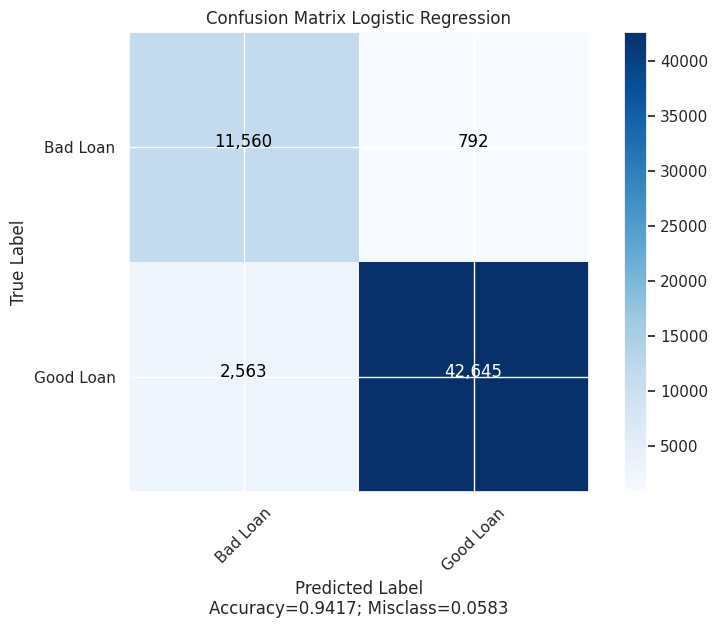

In [ ]:
# Pipeline model Logistic Regression
model_LR = Pipeline([
    ('preprocessing', preprocessor),   # Gunakan preprocessor dari log+scale
    ('smote', SMOTE(random_state=42)), # Oversampling untuk mengatasi imbalance
    ('clf', LogisticRegression(random_state=42))  # Model klasifikasi
])

# Latih model
model_LR.fit(X_train, y_train)
print("Training selesai!")

# Akurasi Training dan Testing
train_acc = model_LR.score(X_train, y_train)
test_acc = model_LR.score(X_test, y_test)
print(f"Akurasi Training: {train_acc:.4f}")
print(f"Akurasi Testing : {test_acc:.4f}")

# Prediksi probabilitas dan kelas
y_proba = model_LR.predict_proba(X_test)
y_pred = model_LR.predict(X_test)

# Evaluasi dengan ROC AUC dan KS
ks_stat, auc_score = evaluate_ks_and_roc_auc(y_test, y_proba)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report (Logistic Regression):\n", report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ["Bad Loan", "Good Loan"]
plot_conf_matrix(cm, labels, title="Confusion Matrix Logistic Regression", normalize=False)



### XGBOOST

Model XGBoost berhasil dilatih!
Akurasi Training XGB: 0.9899
Akurasi Testing XGB : 0.9840
ROC AUC: 0.9978
KS: 0.9625 (p-value: 0.000e+00)
Classification Report - XGBoost:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     12352
           1       0.99      0.99      0.99     45208

    accuracy                           0.98     57560
   macro avg       0.97      0.98      0.98     57560
weighted avg       0.98      0.98      0.98     57560



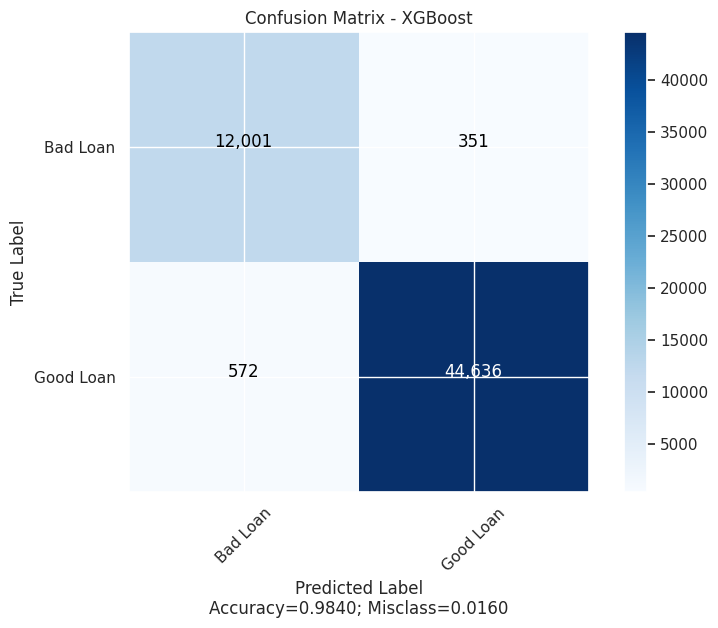

In [ ]:
# Pipeline utama untuk model XGBoost
pipeline_xgb = Pipeline([
    ('preprocessing', preprocessor),      # Transformasi fitur numerik (log + scaling)
    ('smote', SMOTE(random_state=42)),                       # Oversampling untuk kelas minoritas
    ('xgb', xgb.XGBClassifier(objective="binary:logistic", random_state=42))
])

# Latih model
pipeline_xgb.fit(X_train, y_train)
print("Model XGBoost berhasil dilatih!")

# Akurasi Training dan Testing
train_acc_xgb = pipeline_xgb.score(X_train, y_train)
test_acc_xgb = pipeline_xgb.score(X_test, y_test)
print(f"Akurasi Training XGB: {train_acc_xgb:.4f}")
print(f"Akurasi Testing XGB : {test_acc_xgb:.4f}")

# Prediksi probabilitas dan kelas
y_proba_xgb = pipeline_xgb.predict_proba(X_test)
y_pred_xgb = pipeline_xgb.predict(X_test)

# Evaluasi
ks_stat_xgb, auc_score_xgb = evaluate_ks_and_roc_auc(y_test, y_proba_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
print("Classification Report - XGBoost:\n", report_xgb)

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
label_names = ["Bad Loan", "Good Loan"]
plot_conf_matrix(cm_xgb, label_names, title="Confusion Matrix - XGBoost", normalize=False)


## Feature Importance from XGB

Top 5 Most Important Features (XGBoost):
delinq_2yrs                   0.230913
inq_last_6mths                0.214753
total_rec_late_fee            0.138282
initial_list_status_w         0.082094
purpose_debt_consolidation    0.035713
dtype: float32


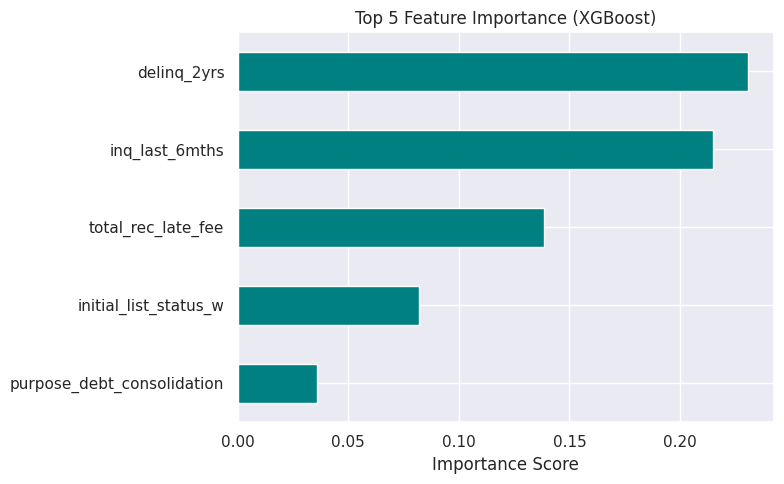

In [ ]:
# Ambil feature importances dari XGBoost
importances = pipeline_xgb.named_steps['xgb'].feature_importances_

# Ambil nama kolom asli dari data_feat
feature_names = data_feat.columns

# Buat Series dan urutkan
feature_importance = pd.Series(importances, index=feature_names)
top5_features = feature_importance.sort_values(ascending=False).head(5)

# Tampilkan hasil
print("Top 5 Most Important Features (XGBoost):")
print(top5_features)

# Visualisasikan
top5_features.plot(kind='barh', title="Top 5 Feature Importance (XGBoost)", figsize=(8, 5), color='teal')
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



📊 Top 5 Feature Importance (XGBoost):

1. delinq_2yrs (0.2309)
   → Jumlah keterlambatan pembayaran dalam 2 tahun terakhir.
   → Sering menunggak menandakan risiko gagal bayar lebih tinggi.

2. inq_last_6mths (0.2148)
   → Jumlah pengajuan kredit dalam 6 bulan terakhir.
   → Aktivitas tinggi bisa mengindikasikan tekanan keuangan.

3. total_rec_late_fee (0.1382)
   → Total denda keterlambatan yang sudah dibayarkan.
   → Menunjukkan histori keterlambatan yang relevan terhadap risiko.

4. initial_list_status_w (0.0821)
   → Status awal pinjaman (misal: 'w' = whole loan).
   → Bisa menunjukkan kanal distribusi yang lebih berisiko.

5. purpose_debt_consolidation (0.0357)
   → Tujuan pinjaman untuk konsolidasi utang.
   → Meskipun umum, tetap dianggap relevan karena bisa menandakan beban utang berat.

🔍 Kesimpulan:
Model XGBoost menilai riwayat keterlambatan dan aktivitas kredit terkini sebagai indikator utama risiko gagal bayar.

✅ Rekomendasi:
• Perhatikan borrower dengan delinq_2yrs dan inq_last_6mths yang tinggi.
• Tambahkan threshold atau pengawasan ekstra di fitur-fitur penting ini dalam kebijakan underwriting.